# **1. Import Packages**

In [334]:
!pip install prince

In [335]:
!pip install shap

In [336]:
## Handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Tensorflow
import tensorflow as tf
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
from keras.metrics import FalseNegatives
from keras.metrics import FalsePositives
from keras.metrics import TruePositives
from keras.metrics import TrueNegatives
from keras.metrics import Recall
from keras.metrics import Precision
from keras.metrics import BinaryAccuracy

## Factorial Analysis
from prince import FAMD

## Statistic
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

## Time
import time

## Shap
import shap

## Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss
from sklearn.metrics import cohen_kappa_score, average_precision_score, precision_recall_curve, roc_curve

## Typing
from typing import Dict
from typing import List

## Warnings
import warnings
warnings.filterwarnings('ignore')

In [337]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Load data**

In [338]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_approval_dataset.csv')
data.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [339]:
# Data set size
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 4269 rows and 13 columns


In [340]:
print('=='*30)
print(' '*12, 'Data set Information')
print('=='*30)
print(data.info())

             Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memor

In [341]:
## We remove the 'loan_id' column
data.drop('loan_id',axis=1,inplace=True)

# **3. EDA**

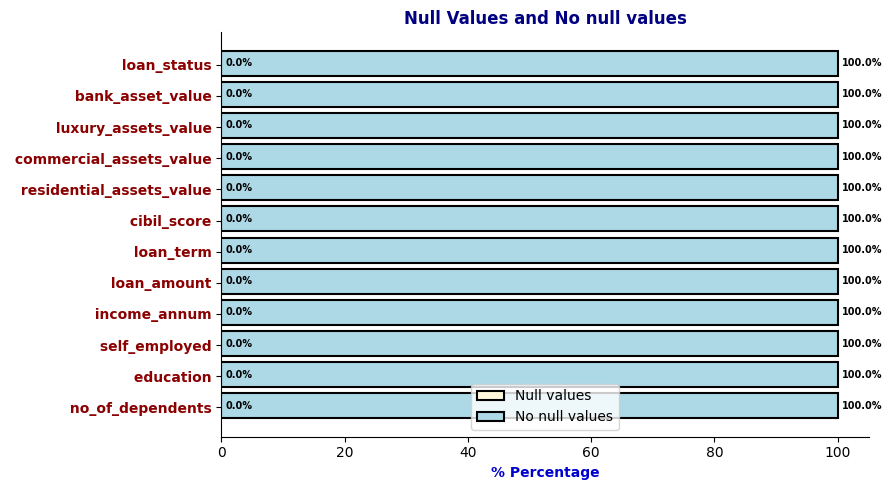

In [342]:
## Checking for null values

plt.style.use('default')
df_null_values = data.isnull().sum().to_frame().rename(columns={0:'Count'})
df_null_values['Porcentaje_nulos'] = (df_null_values['Count']/len(data))*100.
df_null_values['Porcentaje_no_nulos'] = 100.-df_null_values['Porcentaje_nulos']

# We obtain the position of each label on the X axis
n = len(df_null_values.index)
x = np.arange(n)

fig,ax = plt.subplots(figsize=(9,5))
# Bar graph for the Train
rects1 = ax.barh(x, df_null_values.iloc[:,1], label='Null values', linewidth=1.5,edgecolor='black',color='#FFF8DC')
# Bar graph for the Test
rects2 = ax.barh(x, df_null_values.iloc[:,2], label='No null values',linewidth=1.5, edgecolor='black', color = '#ADD8E6')

ax.set_title('Null Values and No null values',fontsize=12, fontweight='bold', color = '#000080')
ax.set_xlabel('% Percentage',fontsize=10, fontweight='bold', color = '#0000CD')
ax.set_yticks(x-0.05)
ax.set_yticklabels(df_null_values.index, fontsize=10, fontweight='bold',color='darkred')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

def autolabel(rects):
# Function to add a label with the value in each bar
  for rect in rects:
      width = rect.get_width()
      height = rect.get_height()
      ax.annotate('{}%'.format(width),
                  xy=(width, rect.get_y() + rect.get_height() / 2),
                  xytext=(3,0),
                  textcoords="offset points",
                  ha='left', va='center', size = 7, weight = 'bold')
# We add the labels for each bar
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.show()

In [343]:
## We check if there are duplicate data
print(f'There are {data.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


In [344]:
## Remove the blank spaces on either side of each variable name.
data.columns = data.columns.str.strip()
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [345]:
## We select the numeric and categorical variables to plot.
categoricas_graph = data.select_dtypes(include=['object','category']).columns.to_list()
numericas_graph = data.select_dtypes(include=['int','float']).columns.to_list()

print('=='*30)
print('Variables of categorical origin and number of unique values')
print('=='*30)
for categoria in categoricas_graph:
    print('*',categoria,'-->',data[categoria].nunique())

print('--'*30)
print('=='*30)
print('Numeric Source Variables')
print('=='*30)
for numerica in numericas_graph:
  print('*',numerica)

Variables of categorical origin and number of unique values
* education --> 2
* self_employed --> 2
* loan_status --> 2
------------------------------------------------------------
Numeric Source Variables
* no_of_dependents
* income_annum
* loan_amount
* loan_term
* cibil_score
* residential_assets_value
* commercial_assets_value
* luxury_assets_value
* bank_asset_value


In [346]:
## We convert the numeric variables from type int to type float.
for i in numericas_graph:
  data[i] = data[i].astype(float)

In [347]:
print('=='*30)
print(' '*12, 'Data set Information')
print('=='*30)
print(data.info())

             Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   float64
 1   education                 4269 non-null   object 
 2   self_employed             4269 non-null   object 
 3   income_annum              4269 non-null   float64
 4   loan_amount               4269 non-null   float64
 5   loan_term                 4269 non-null   float64
 6   cibil_score               4269 non-null   float64
 7   residential_assets_value  4269 non-null   float64
 8   commercial_assets_value   4269 non-null   float64
 9   luxury_assets_value       4269 non-null   float64
 10  bank_asset_value          4269 non-null   float64
 11  loan_status               4269 non-null   object 
dtypes: float64(9), object(3)
memory usage: 400.3+ KB
None


## **3.1 Univariate Analysis**

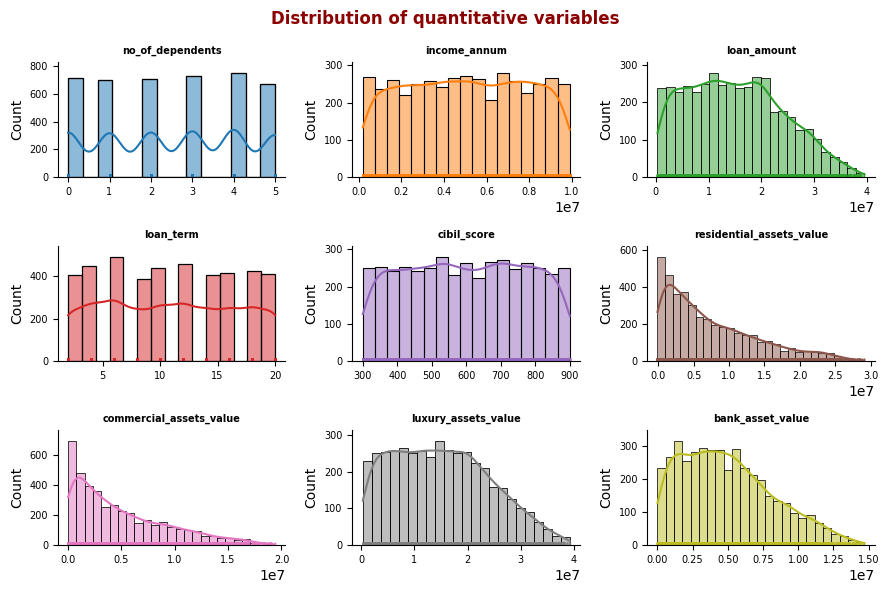

In [348]:
fig,ax = plt.subplots(3,3,figsize=(9,6))
ax = ax.flat
for i,col in enumerate(numericas_graph):
  sns.histplot(data,
               x = col,
               stat = 'count',
               kde=True,
               color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth':1.5},
               ax = ax[i])
  sns.rugplot(data,
              x = col,
              color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
              alpha = 1.0,
              ax = ax[i])
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].tick_params(labelsize=7)
  ax[i].set_title(col, fontsize = 7, fontweight = 'bold')
  ax[i].set_xlabel('')
fig.suptitle('Distribution of quantitative variables',fontsize=12, fontweight='bold',color='darkred')
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

In [349]:
## We define our function to check if our data is normally distributed.
def shapiro_test(col:str):
  stat,p_value = shapiro(data[col])
  if p_value < 0.05:
    return f'{col} => No Normal Ditribution'
  else:
    return f'{col} => Normal Distribution'

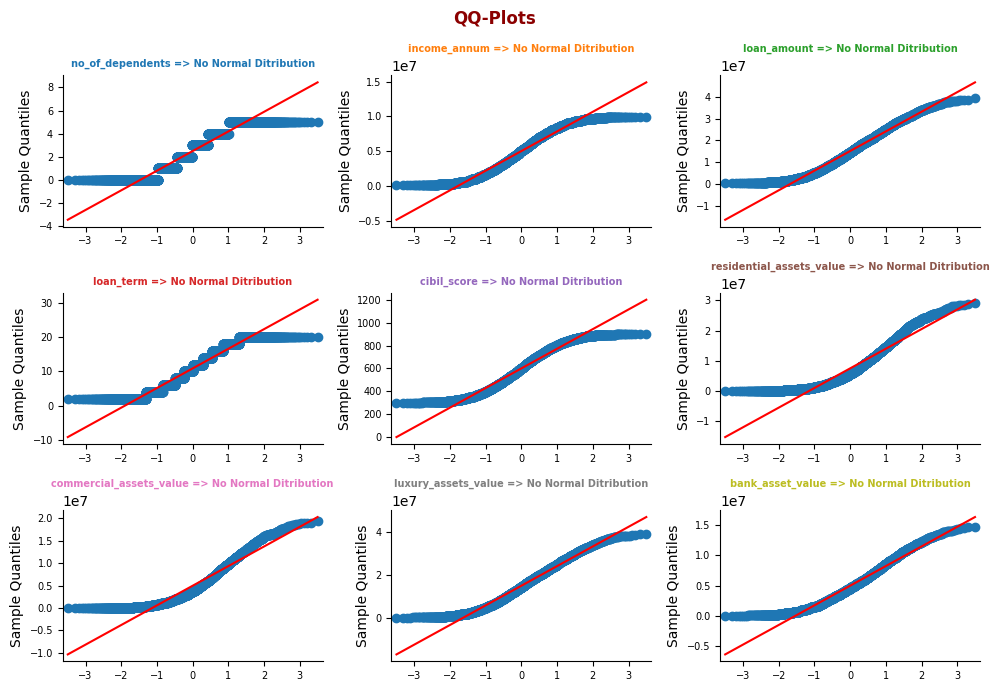

In [350]:
## We create our QQ-Plot graphs.
fig,ax = plt.subplots(3,3,figsize=(10,7))
ax = ax.flat
for i,col in enumerate(numericas_graph):
  qqplot(data[col], line = 's', ax = ax[i])
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].tick_params(labelsize=7)
  ax[i].set_title(shapiro_test(col), fontsize = 7, fontweight = 'bold', color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
  ax[i].set_xlabel('')
fig.suptitle('QQ-Plots',fontsize=12, fontweight='bold',color='darkred')
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

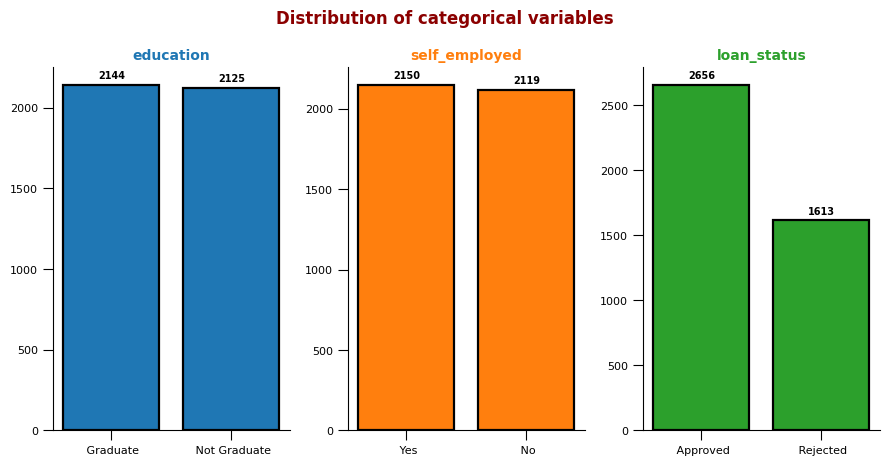

In [351]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 4.7))
ax = ax.flat

for i,column in enumerate(categoricas_graph):
  df1 = data[column].value_counts().to_frame()
  rects1 = ax[i].bar(df1.index, df1.iloc[:,0], linewidth = 1.6, edgecolor = 'black',color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
  ax[i].set_title(column,fontsize=10,fontweight='bold',color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
  ax[i].tick_params(labelsize=8, size=7, labelcolor = 'black')
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['bottom'].set_visible(True)
  ax[i].spines['right'].set_visible(False)
  def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax[i].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 7, weight = 'bold')
  autolabel(rects1)

fig.suptitle('Distribution of categorical variables',fontsize=12,fontweight='bold',color='darkred')
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

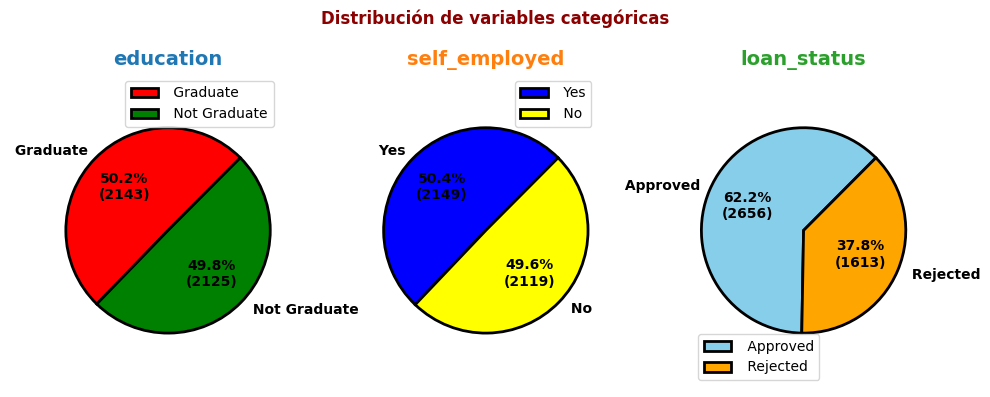

In [352]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
colors = [['red','green'],['blue','yellow'],['skyblue','orange']]
for i,col in enumerate(categoricas_graph):
  def func(pct, allvalues):

      absolute = int(pct/100.*np.sum(allvalues))
      return "{:.1f}%\n({:d})".format(pct, absolute)

  counts = data[col].value_counts()

  labels = counts.index.tolist()
  values = counts.values.tolist()

  ax[i].pie(x = values, labels = labels, autopct = lambda pct: func(pct,counts.values),
        startangle=45, colors = colors[i] ,wedgeprops={'linewidth':2,'edgecolor':'black'},
        textprops = {'color':'black', 'weight':'bold','fontsize':10})
  ax[i].set_title(col, fontsize = 14, fontweight = 'bold', color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
  ax[i].axis('equal')
  ax[i].legend()

fig.suptitle('Distribución de variables categóricas',fontsize=12,fontweight='bold',color='darkred')
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

## **3.2 Bivariate Analysis**

In [353]:
def bivariate_categorical_plot(var_1:str, var_2:str)->None:
  """
  Function that plots a bivariate graph between two variables of categorical origin.

  Args:

   - var_1: categorical variable on the x-axis.
   - var_2: categorical variable on the y axis.
  """

  # We made a cross table between the categorical variables.
  df = pd.crosstab(data[var_1],data[var_2])

  #We obtain the position of each label on the X axis.
  n = len(df.index)
  x = np.arange(n)

  #Size of each bar.
  width = 0.25

  fig,ax = plt.subplots(figsize=(6,4))
  rects1 = ax.bar(x-width, df.iloc[:,0], width=width, label=df.columns[0],linewidth=1.6,edgecolor='black',color='#00FF00')
  rects2 = ax.bar(x, df.iloc[:,1], width=width, label=df.columns[1],linewidth=1.6, edgecolor='black', color = '#4B0082')

  ax.set_title(f'{var_1} vs {var_2}',fontsize=12, fontweight='bold', color = 'darkred')
  ax.set_ylabel('Count',fontsize=10, fontweight='bold')
  ax.set_xticks(x-0.13)
  ax.set_xticklabels(df.index, fontsize=10, fontweight='bold')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.legend(loc='best')

  def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 7, weight = 'bold')

  autolabel(rects1)
  autolabel(rects2)
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

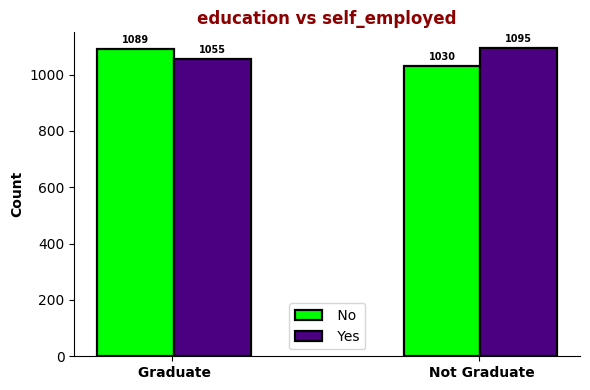

In [354]:
## Education vs Self employed
bivariate_categorical_plot('education','self_employed')

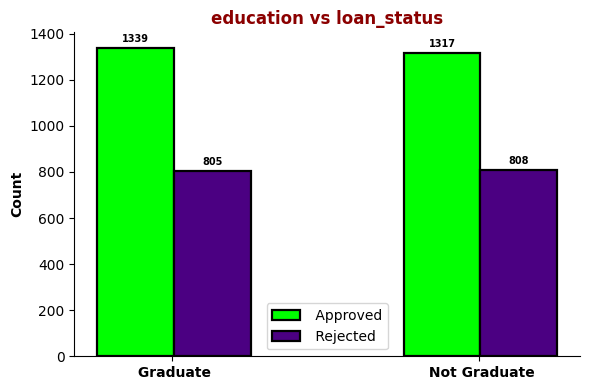

In [355]:
## Education vs Loan status
bivariate_categorical_plot('education','loan_status')

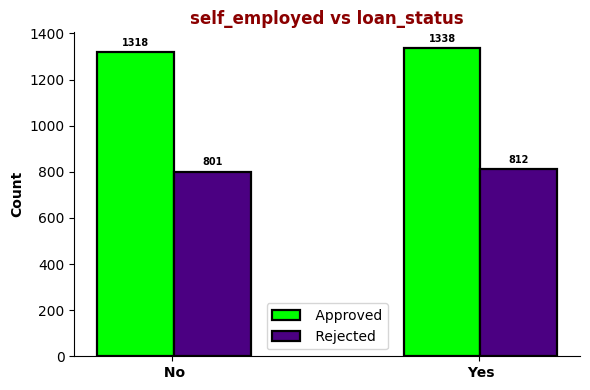

In [356]:
## Self employed vs Loan status
bivariate_categorical_plot('self_employed','loan_status')

In [357]:
def bivariate_num_cat_plot(var_nums:list, var_cat:str)->None:
  """
  Function that plots boxplot plots between a list of quantitative source variables
  and a variable of categorical origin.
  args:
   - var_nums: list of numeric source variables.
   - var_cat: categorical source variable.
  """
  fig,ax = plt.subplots(3,3,figsize=(10,7))
  ax=ax.flat
  for i,col in enumerate(var_nums):
    sns.boxplot(data, x = var_cat ,  y = var_nums[i], width = 0.5, ax = ax[i])
    ax[i].set_title(f'{var_nums[i]} vs {var_cat}', fontsize=8, fontweight='bold', color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_ylabel(var_nums[i], fontsize = 7, fontweight = 'bold')
    ax[i].set_xlabel('')

  fig.suptitle('Numerical Variables and Categorical Variables',fontsize=12,fontweight='bold',color='darkred')
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

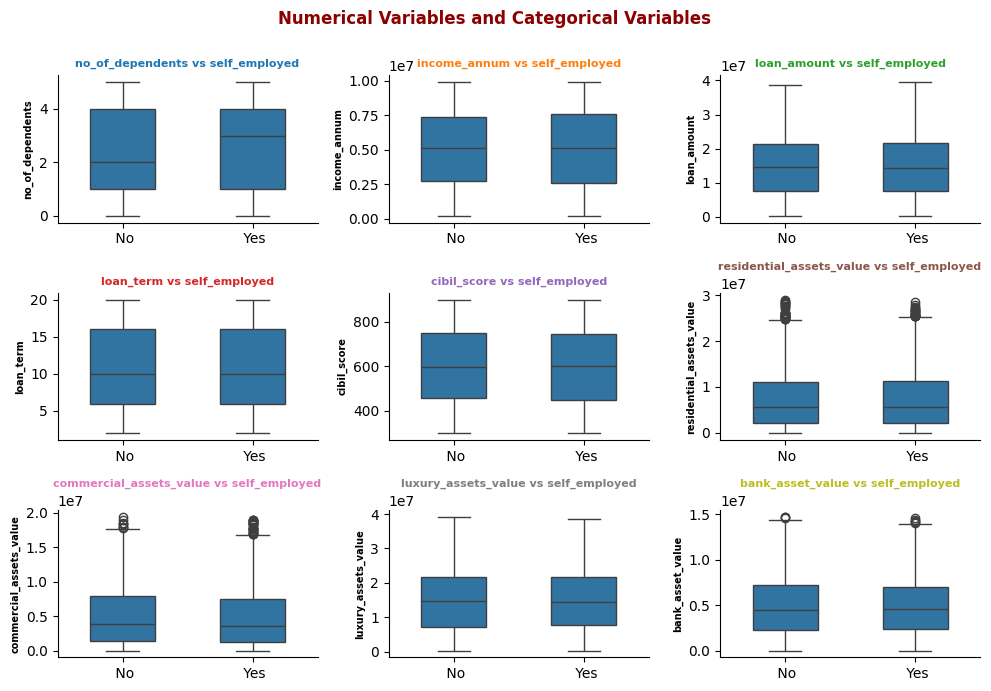

In [358]:
## Numerical variables vs Self employed
bivariate_num_cat_plot(numericas_graph, 'self_employed')

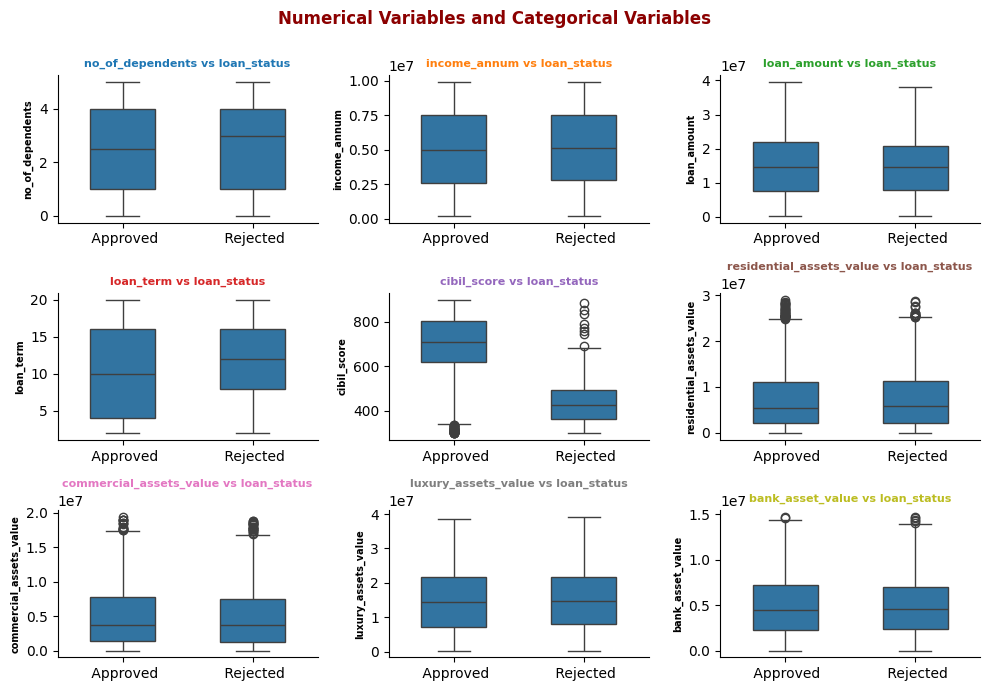

In [359]:
## Numerical variables vs Loan status
bivariate_num_cat_plot(numericas_graph, 'loan_status')

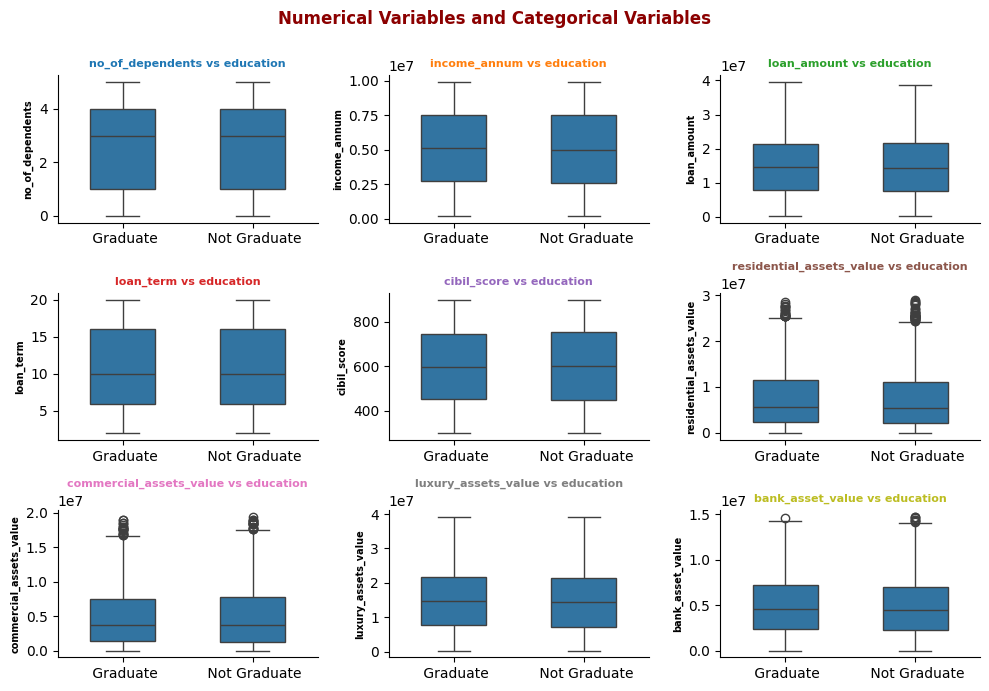

In [360]:
## Numerical variables vs Education
bivariate_num_cat_plot(numericas_graph, 'education')

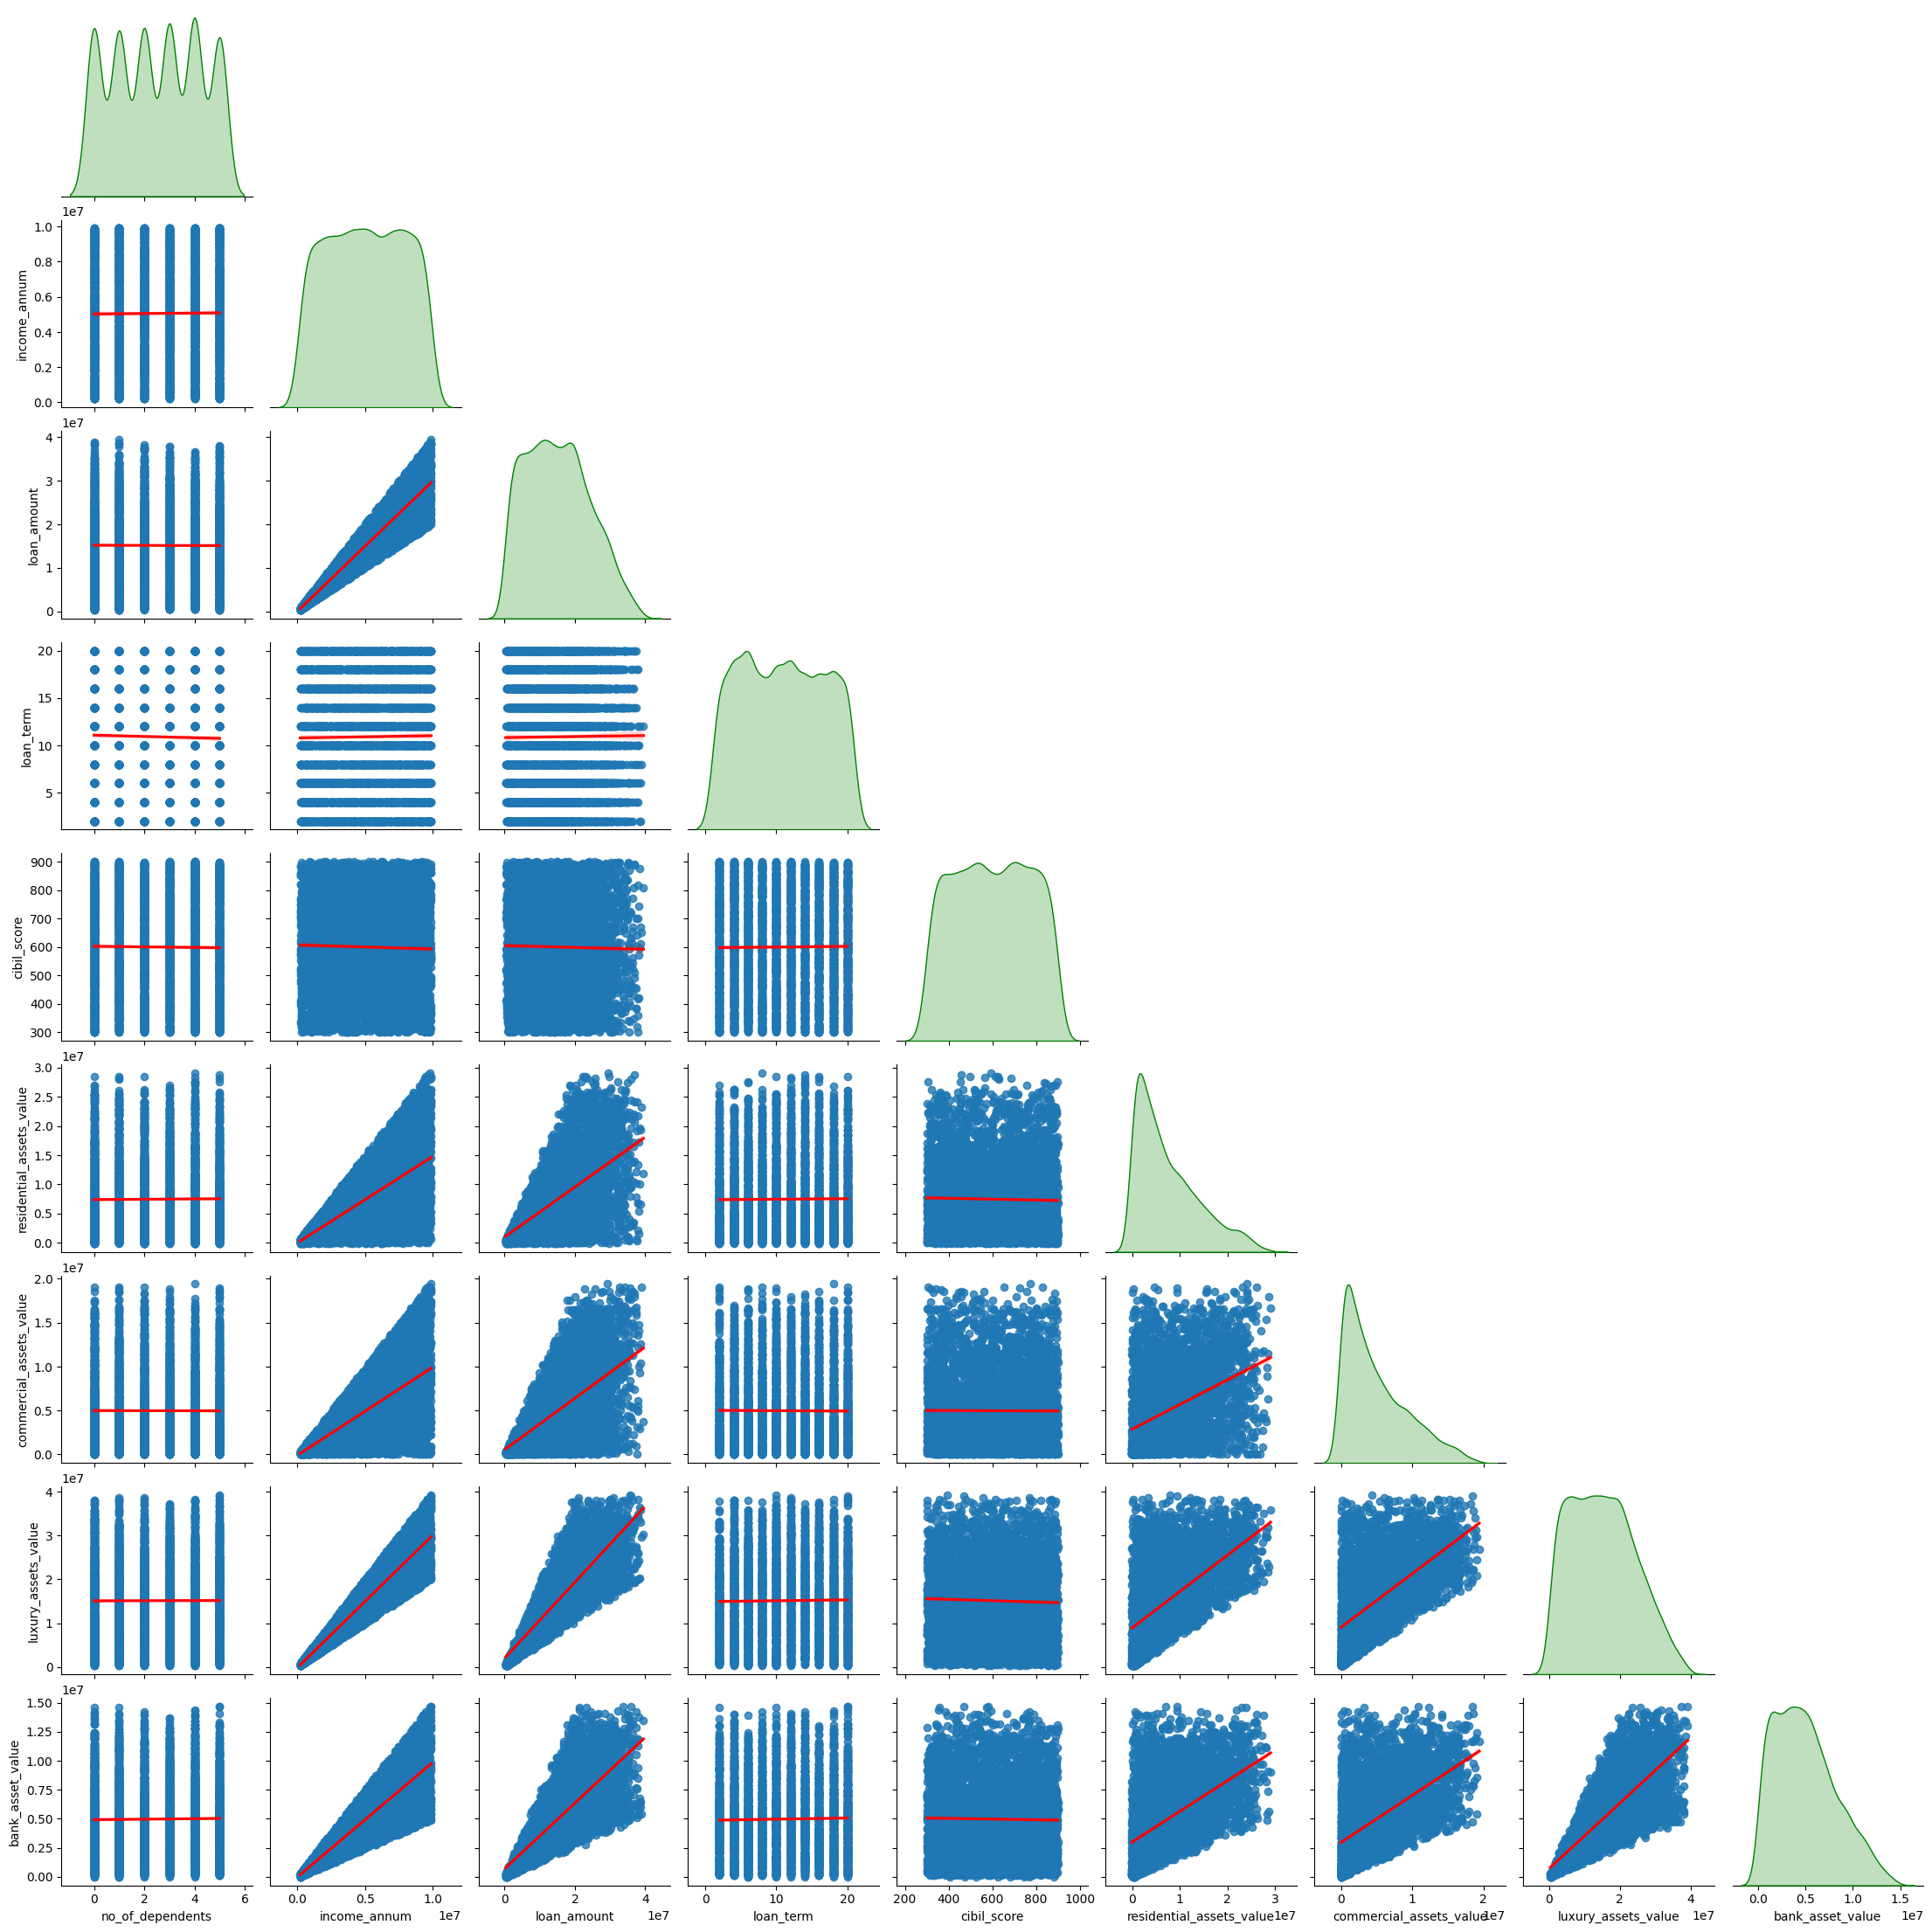

In [361]:
## Bivariate graph of variables of numerical origin.
plot_bivariate_numerical = sns.pairplot(data, corner=True, diag_kind='kde', kind = 'reg', plot_kws = {'line_kws':{'color':'red'}}, diag_kws = {'color':'green'})
plot_bivariate_numerical.fig.show()

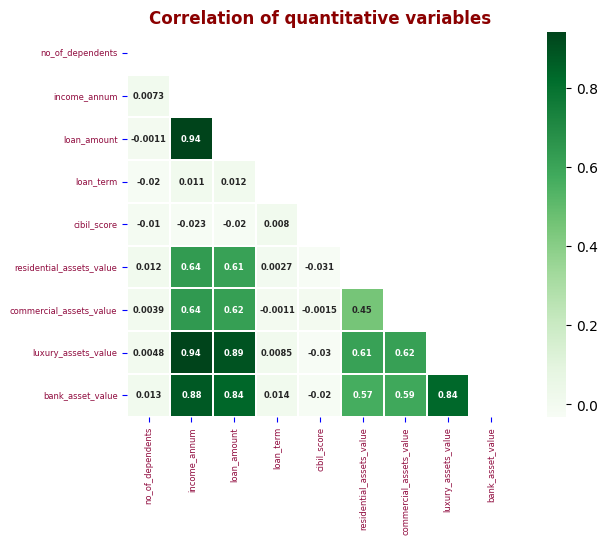

In [362]:
## Correlation graph between quantitative source variables.
corr_matrix = data[numericas_graph].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig,ax = plt.subplots(figsize=(9,5))
sns.heatmap(corr_matrix,
            mask = mask,
            square = True,
            annot = True,
            ax = ax,
            linewidths = 0.2,
            annot_kws = {'size':6, 'fontweight':'bold'},
            cmap='Greens')
ax.tick_params(labelsize=6, color = 'blue', labelcolor='#900C3F')
ax.set_title('Correlation of quantitative variables',fontweight='bold', color = 'darkred')
fig.show()

## **3.3 Multivariate Analysis**

In [363]:
# We define a random seed.
SEED = 123

In [364]:
# Factorial analysis of qualitative and quantitative variables.
famd = FAMD(n_components = 2,
            n_iter = 10,
            random_state = SEED)
famd.fit(data)

FAMD(n_iter=10, random_state=123)

In [365]:
famd.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              4.490        33.26%                     33.26%
1              2.236        16.56%                     49.82%

In [366]:
famd.column_coordinates_

component                            0             1
variable                                            
no_of_dependents          3.656442e-05  7.023598e-04
income_annum              9.473667e-01  2.012159e-05
loan_amount               8.709800e-01  7.615276e-04
loan_term                 2.046173e-04  1.596962e-02
cibil_score               1.094908e-03  8.154307e-01
residential_assets_value  5.087851e-01  1.009787e-05
commercial_assets_value   5.192387e-01  7.321526e-04
luxury_assets_value       8.675555e-01  7.149648e-08
bank_asset_value          7.742211e-01  1.066176e-04
education                 2.165671e-04  3.569284e-05
loan_status               2.966244e-04  9.345299e-01
self_employed             1.903474e-07  4.803092e-05

In [367]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=famd.column_coordinates_[0], y=famd.column_coordinates_[1], mode='markers'))

for i, txt in enumerate(famd.column_coordinates_.index):
    x_pos = famd.column_coordinates_[0].iat[i]
    y_pos = famd.column_coordinates_[1].iat[i]
    text_shift = 0.05

    fig.add_annotation(x=x_pos + 0, y=y_pos + 0.0, text=txt)

fig.show()


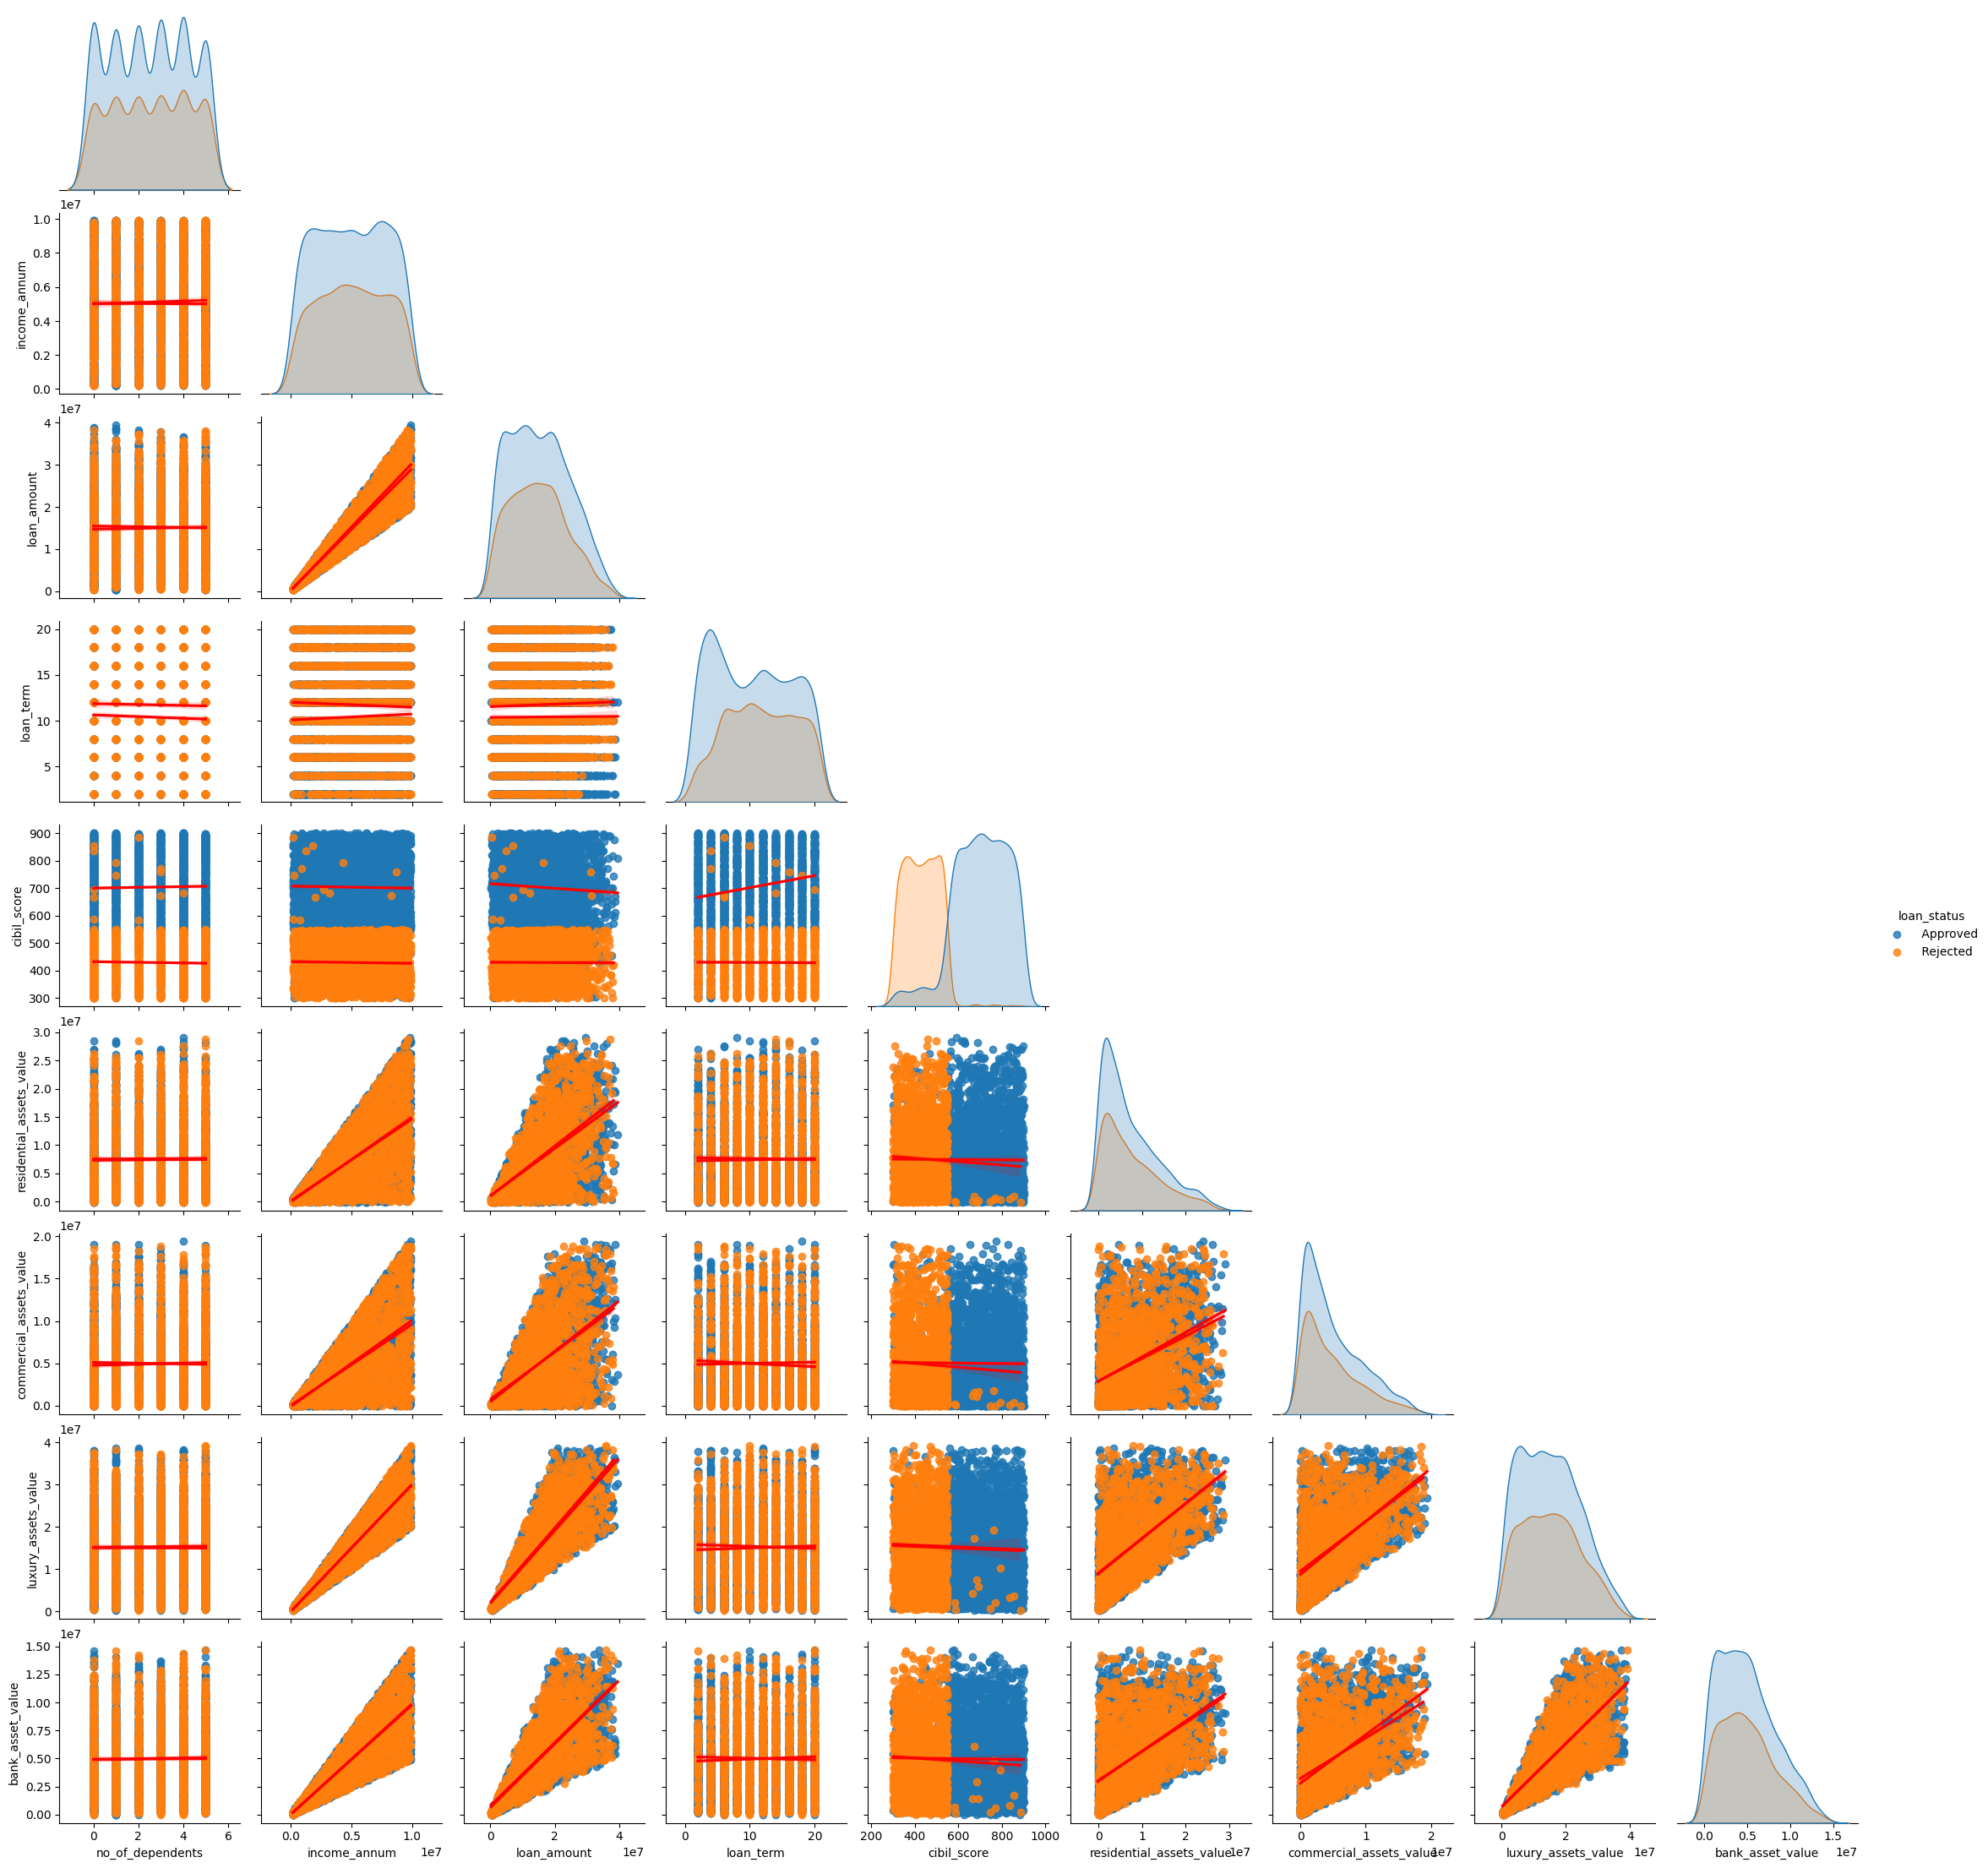

In [368]:
plot_multivariate = sns.pairplot(data,
                                 corner=True,
                                 diag_kind='kde',
                                 hue = 'loan_status',
                                 kind = 'reg',
                                 plot_kws = {'line_kws':{'color':'red'}},
                                 diag_kws = {'color':'green'})
plot_multivariate.fig.show()

# **4. Preprocessing**

In [369]:
## We remove the whitespace on either side of each value of the 'loan_status' variable.
data['loan_status'] = data['loan_status'].str.strip()

In [370]:
## We map the values of the target variable to convert to numeric values.
## 1 : Approved
## 0 : Rejected

map = {'Approved':1, 'Rejected':0}

data['loan_status'] = data['loan_status'].map(map)

In [371]:
## We divided into independent variables and dependent variable.
X = data.drop('loan_status',axis=1)
y = data['loan_status']

## We divided into training and test data.
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size=0.3,
                                       random_state = SEED,
                                       shuffle = True,
                                       stratify = y)
print('=='*15)
print('Size of our training set:')
print('=='*15)
print(f'X_train ==> {X_train.shape}')
print(f'y_train ==> {y_train.shape}\n')
print('=='*15)
print('Size of our testing set:')
print('=='*15)
print(f'X_test ==> {X_test.shape}')
print(f'y_test ==> {y_test.shape}')

Size of our training set:
X_train ==> (2988, 11)
y_train ==> (2988,)

Size of our testing set:
X_test ==> (1281, 11)
y_test ==> (1281,)


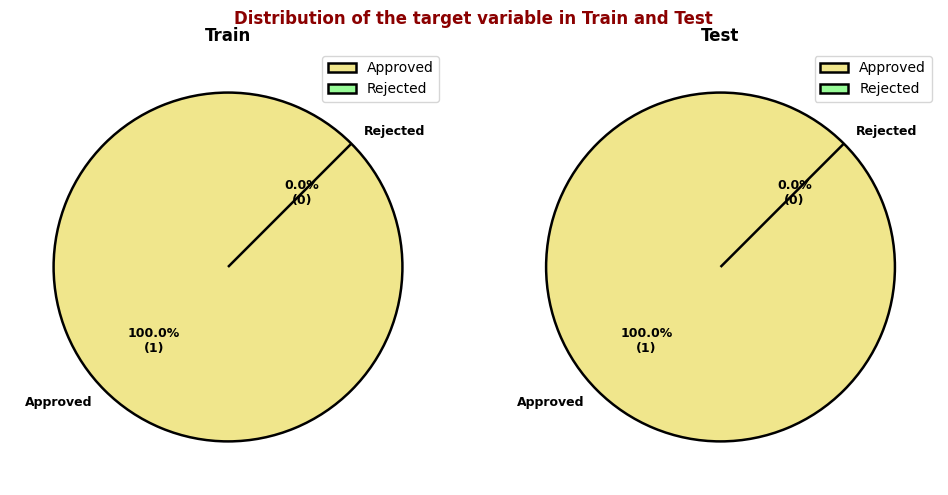

In [372]:
### We visualize the distribution of the target variable in training and testing.

count_class_train = y_train.value_counts().to_frame().reset_index().rename(columns={'index':'class', 'loan_status':'cantidad'})
count_class_test = y_test.value_counts().to_frame().reset_index().rename(columns={'index':'class', 'loan_status':'cantidad'})

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax[0].pie(count_class_train.cantidad,
          labels = ['Approved','Rejected'],
          autopct= lambda pct: func(pct,count_class_train.cantidad),
          startangle=45,
          colors = ['#F0E68C','#98FB98'], wedgeprops={'linewidth':1.8,'edgecolor':'black'},
          textprops = {'color':'black', 'weight':'bold','fontsize':9})
ax[0].legend()
ax[0].set_title('Train', fontsize=12, fontweight='bold')

ax[1].pie(count_class_train.cantidad,
          labels = ['Approved','Rejected'],
          autopct= lambda pct: func(pct,count_class_test.cantidad),
          colors = ['#F0E68C','#98FB98'], wedgeprops={'linewidth':1.8,'edgecolor':'black'},
          textprops = {'color':'black', 'weight':'bold','fontsize':9},
          startangle=45)
ax[1].legend()
ax[1].set_title('Test',fontsize=12, fontweight='bold')

fig.suptitle('Distribution of the target variable in Train and Test',fontsize=12, fontweight='bold', color = 'darkred')
fig.subplots_adjust(top=0.9)
fig.tight_layout()
fig.show()

In [373]:
### We select the categorical and numeric variables for preprocessing.

# Qualitative variables.
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.to_list()
# Quantitative variables.
numerical_cols = X_train.select_dtypes(include=['int','float']).columns.to_list()

In [374]:
## We define our preprocessor.
# - OneHotEncoder encoding for qualitative variables.
# - Standardization for quantitative variables.
preprocesador = ColumnTransformer([('ohe',OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                                    categorical_cols),
                                   ('scaler',StandardScaler(),numerical_cols)],
                                  remainder = 'passthrough',
                                  verbose_feature_names_out=False).set_output(transform='pandas')

## We fit and transform our training data.
X_train_prep = preprocesador.fit_transform(X_train)

## We transform our test set.
X_test_prep = preprocesador.transform(X_test)

## We show the size of our data sets.
print(f'Training Set Size: {X_train_prep.shape}')
print(f'Testing Set Size: {X_test_prep.shape}')

Training Set Size: (2988, 13)
Testing Set Size: (1281, 13)


In [375]:
## We transform our data that is in 'pandas' format to type 'array'.
X_train_prep_array = X_train_prep.to_numpy(dtype = 'float32')
X_test_prep_array = X_test_prep.to_numpy(dtype = 'float32')
y_train_array = y_train.to_numpy(dtype = 'float32')
y_test_array = y_test.to_numpy(dtype = 'float32')

# **5. Function for evaluation of metrics**

In [376]:
## Specificity score
def specificity_score(y_true:np.ndarray, y_pred:np.ndarray):
  """
  Function to calculate the specificity score.

  Args:

    - y_true(array): true value.
    - y_pred(array): predicted value.

  Return:

    -specificity_score(float)
  """
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn/(tn+fp)
  return specificity

In [377]:
## Métrics
def metrics_classification (y_true:np.ndarray,
                            y_pred:np.ndarray,
                            y_probs_positive:np.ndarray) -> Dict[str,float]:
  """
  Function to calculate the following Classification Metrics.

  - accuracy
  - f1_score
  - precision
  - recall
  - auc
  - specificity
  - log_loss
  - cohen_kappa
  - gini

  Args:
  - y_true(array): true value.
  - y_pred(array): predicted value.
  - y_probs_positive(array): positive class value.

  Return:
  - Metrics Classification(dict)
  """
  accuracy = round(accuracy_score(y_true, y_pred),3)
  f1 = round(f1_score(y_true, y_pred),3)
  precision = round(precision_score(y_true, y_pred),3)
  recall = round(recall_score(y_true, y_pred),3)
  auc = round(roc_auc_score(y_true, y_probs_positive),3)
  specificity = round(specificity_score(y_true, y_pred),3)
  logloss = round(log_loss(y_true, y_probs_positive),3)
  cohen_kappa = round(cohen_kappa_score(y_true, y_pred),3)
  gini = round(2 * auc -1,2)

  my_metrics = {'accuracy':accuracy,
                'f1_score':f1,
                'precision':precision,
                'recall':recall,
                'specificity':specificity,
                'auc':auc,
                'log_loss':logloss,
                'cohen_kappa':cohen_kappa,
                'gini':gini}
  return my_metrics

In [378]:
## Metrics plots
def metrics_plot(metrics_train:dict, metrics_test:dict, metrics:list)->None:
    """
    Function to plot the selected metrics.

    Args:

      - metrics_train(dict): training set metrics.
      - metrics_test(dict): testing set metrics.
      - metrics(list): list of metrics to plot.

    Return:
      - Plots metrics
    """
    # Creamos un dataframe con las métricas de entrenamiento y de prueba
    df_metrics = pd.DataFrame(index = metrics,
                              data = {'Train':[metrics_train[metric] for metric in metrics],
                                      'Test':[metrics_test[metric] for metric in metrics]})


    n = len(df_metrics.index)
    x = np.arange(n)


    width = 0.25

    fig,ax = plt.subplots(figsize=(6,4))

    rects1 = ax.bar(x-width, df_metrics.Train, width=width, label='Train',linewidth=1.6,edgecolor='black',color='blue')

    rects2 = ax.bar(x, df_metrics.Test, width=width, label='Test',linewidth=1.6, edgecolor='black', color = 'red')

    ax.set_title('Metrics',fontsize=12, fontweight='bold')
    ax.set_ylabel('Score',fontsize=10, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(x-0.13)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='bold')
    ax.legend()

    def autolabel(rects):

      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'bold')

    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    fig.show()

In [379]:
## Confusion Matrix
def confusion_matrix_plot (y_train:np.ndarray,
                           y_pred_train:np.ndarray,
                           y_test:np.ndarray,
                           y_pred_test:np.ndarray)->None:

    """
    Function to plot the confusion matrices for the training and test set.

    Args:

      - y_train(array): true value of the target variable of the training set.
      - y_pred_train(array): predicted value of the target variable of the training set.
      - y_test(array): true value of the target variable of the testing set.
      - y_pred_test(array): predicted value of the target variable of the testing set.

    Return:
      - Confusion Matrix plots
    """

    # We calculate the confusion matrix for training and testing.
    confusion_train = confusion_matrix(y_train, y_pred_train)

    confusion_test = confusion_matrix(y_test, y_pred_test)

    # Calculate the percentages
    sumatoria_train = np.sum(confusion_train, axis = 1)
    porcentajes_train = confusion_train / sumatoria_train[:,np.newaxis]*100

    sumatoria_test = np.sum(confusion_test, axis = 1)
    porcentajes_test = confusion_test / sumatoria_test[:,np.newaxis]*100

    # Create a list of labels with values ​​and percentages
    etiquetas_train = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_train, porcentajes_train)]

    etiquetas_test = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_test, porcentajes_test)]

    # Create the heatmap with the labels.
    fig,axes = plt.subplots(1,2,figsize=(9,4))
    sns.heatmap(confusion_train,
                annot = np.array(etiquetas_train),
                fmt = '',
                cmap = 'Blues',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[0])
    sns.heatmap(confusion_test,
                annot = np.array(etiquetas_test),
                fmt = '',
                cmap = 'Oranges',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[1])
    # Add the texts TP, FN, FP, TN to the train matrix
    axes[0].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[0].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].set_title('Confusion Matrix Train',fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[0].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[0].set_xticklabels(['Rejected','Approved'])
    axes[0].set_yticklabels(['Rejected','Approved'])
    axes[0].tick_params(rotation=0, size = 8)

    # Add the texts TP, FN, FP, TN to the test matrix
    axes[1].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[1].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].set_title('Confusion Matrix Test',fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[1].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[1].set_xticklabels(['Rejected','Approved'])
    axes[1].set_yticklabels(['Rejected','Approved'])
    axes[1].tick_params(rotation=0, size = 8)

    fig.subplots_adjust(top=0.9)
    fig.tight_layout()
    plt.show()

In [380]:
## Precision Recall Curve
def precision_recall_curve_plot (y_train:np.ndarray,
                                 y_probs_positive_train:np.ndarray,
                                 y_test:np.ndarray,
                                 y_probs_positive_test:np.ndarray)->None:
    """
    Function to plot Precision Recall Curve.


    Args:

      - y_train(array): true value of the target variable of the training set.
      - y_probs_positive(array): predicted value of the positive class of the target variable of the train set.
      - y_test(array): true value of the target variable of the testing set.
      - y_probs_positive_test(array): predicted value of the positive class of the target variable of the test set.

    Return:

      - Precision Recall Curve Plot
    """

    # Calculate the precision, recall and threshold values for the training set.
    precision_train, recall_train, umbral_train = precision_recall_curve(y_train, y_probs_positive_train)
    # Calcular el average_precision para el conjunto de entrenamiento.
    average_precision_train = average_precision_score(y_train, y_probs_positive_train)

    # Calculate the precision, recall and threshold values for the testing set.
    precision_test, recall_test, umbral_test = precision_recall_curve(y_test, y_probs_positive_test)
    # Calcular el average_precision para el conjunto de prueba.
    average_precision_test = average_precision_score(y_test, y_probs_positive_test)


    fig,ax = plt.subplots(figsize=(6,3.5))
    plt.step(recall_train, precision_train, label = 'Precision Recall Curve Train', where = 'post', color = 'blue', alpha = 0.5)
    plt.step(recall_test, precision_test, label = 'Precision Recall Curve Test', where = 'post',color = 'orange', alpha = 0.5)

    plt.axhline(average_precision_train, color = 'red', linestyle = '--', label = f'Average Precision Train = {average_precision_train:.4f}')
    plt.axhline(average_precision_test, color = 'black', linestyle = '--', label = f'Average Precision Test = {average_precision_test:.4f}')

    plt.fill_between(recall_train, precision_train, step = 'post', alpha = 0.7, color = 'blue')
    plt.fill_between(recall_test, precision_test, step = 'post', alpha = 0.7, color = 'orange')

    plt.title('Precision Recall Curve', fontsize = 14, fontweight = 'bold')
    plt.xlabel('Recall', fontsize = 10, fontweight = 'bold')
    plt.ylabel('Precision', fontsize = 10, fontweight = 'bold')
    plt.xlim([0,1.005])
    plt.ylim([0,1.005])
    plt.legend()
    plt.show()

In [381]:
## ROC AUC Curve
def roc_curve_plot(y_train:np.ndarray,
                   y_probs_positive_train:np.ndarray,
                   y_test:np.ndarray,
                   y_probs_positive_test:np.ndarray)->None:
  """
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model.

  Args:

      - y_train(array): true value of the target variable of the training set.
      - y_probs_positive(array): predicted value of the positive class of the target variable of the training set.
      - y_test(array): true value of the target variable of the testing set.
      - y_probs_positive_test(array): predicted value of the positive class of the target variable of the testing set.

  Return:

      - Roc Curve Plot
  """
  fpr_train,tpr_train,thresholds_train = roc_curve(y_train, y_probs_positive_train)
  auc_train = roc_auc_score(y_train, y_probs_positive_train)

  fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_probs_positive_test)
  auc_test = roc_auc_score(y_test, y_probs_positive_test)


  fig,ax = plt.subplots(figsize=(6,3.5))
  plt.plot(fpr_train, tpr_train, color = 'blue', label = f'AUC Train = {auc_train:.4f}')
  plt.plot(fpr_test, tpr_test, color = 'orange', label = f'AUC Test = {auc_test:.4f}')
  plt.plot([0,1],[0,1], color = 'darkred', linestyle = '--')

  plt.xlabel('False Positive rate (Positive label: 1)', fontsize = 9, fontweight = 'bold')
  plt.ylabel('True Positive rate (Positive label: 1)', fontsize = 9, fontweight = 'bold')
  plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize = 12, fontweight = 'bold')
  plt.legend()
  plt.grid(linestyle = '--')
  fig.show()

In [382]:
## Classification Report
def classification_report_plot(y_train:np.ndarray,
                               y_pred_train:np.ndarray,
                               y_test:np.ndarray,
                               y_pred_test:np.ndarray)->None:
  """
  Function to plot the classification reports for the training set and the test set.

  Args:
    - y_train(array): true value of the target variable of the training set.
    - y_pred_train(array): predicted value of the target variable of the training set.
    - y_test(array): actual value of the target variable of the test set.
    - y_pred_test(array): true value of the target variable of the testing set.

  Return:
    - Classification Report Plot
  """

  # We calculate the classification report for the train set.
  clf_report_train = classification_report(y_train, y_pred_train, output_dict = True) # returns us in dictionary format.
  df_clf_report_train = pd.DataFrame(clf_report_train).transpose() # we convert to dataframe and transpose it.
  df_clf_report_train = df_clf_report_train.iloc[:2,:]

  # We calculate the classification report for the test set.
  clf_report_test = classification_report(y_test, y_pred_test, output_dict = True)
  df_clf_report_test = pd.DataFrame(clf_report_test).transpose()
  df_clf_report_test = df_clf_report_test.iloc[:2,:]


  fig,axes = plt.subplots(1,2,figsize=(9,5))

  # Heatmap for the train set.
  sns.heatmap(df_clf_report_train,
              annot = True,
              cmap = 'Blues',
              square = True,
              linecolor = 'white',
              linewidths = 0.5,
              fmt = '.1f',
              cbar = False,
              ax = axes[0])

  axes[0].set_ylabel('Class', fontsize=10, fontweight='bold')
  axes[0].set_title('Classification Report Train', fontsize=12, fontweight='bold')
  axes[0].tick_params(rotation = 0)

  # Heatmap for the test set.
  sns.heatmap(df_clf_report_test,
              annot = True,
              cmap = 'Oranges',
              square = True,
              linecolor = 'white',
              linewidths = 0.5,
              fmt = '.1f',
              cbar = False,
              ax = axes[1])

  axes[1].set_ylabel('Class', fontsize=10, fontweight='bold')
  axes[1].set_title('Classification Report Test', fontsize=12, fontweight='bold')
  axes[1].tick_params(rotation=0)

  fig.tight_layout()
  fig.show()

In [383]:
## Class prediction error
def class_prediction_error(y_train:np.ndarray,
                           y_pred_train:np.ndarray,
                           y_test:np.ndarray,
                           y_pred_test:np.ndarray,
                           classes:list)->None:

  """
  Function to plot the number of errors that were made.

  Args:
    - y_train(array): true value of the target variable of the training set.
    - y_pred_train(array): predicted value of the target variable of the training set.
    - y_test(array): true value of the target variable of the testing set.
    - y_pred_test(array): predicted value of the target variable of the testing set.
    - classes(list): list of classes containing the categories of the target variable.

  Return:
    - Class Prediction Error
  """
  # We generate a confusion matrix for the training set.
  Y_train = confusion_matrix(y_train, y_pred_train).transpose()

  # We generate a confusion matrix for the testing set.
  Y_test = confusion_matrix(y_test, y_pred_test).transpose()

  bottom1 = np.zeros(len(classes))
  bottom2 = np.zeros(len(classes))

  fig, axes = plt.subplots(1,2,figsize=(9,4))
  for i,j in enumerate(Y_train):

    axes[0].bar(classes, j, bottom = bottom1)
    bottom1 += j

    for bar in axes[0].patches:
      axes[0].text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y(),
              round(bar.get_height()), ha = 'center',
              color = 'black', weight = 'bold', size = 9)
  axes[0].spines['top'].set_visible(False)
  axes[0].spines['right'].set_visible(False)
  axes[0].legend(classes, loc = 'best')
  axes[0].set_title('Train',fontsize=9,fontweight='bold',color='blue')
  axes[0].set_ylabel('Count',fontsize=12, fontweight='bold')

  for w,z in enumerate(Y_test):

    axes[1].bar(classes, z,bottom = bottom2)
    bottom2 += z

    for bar in axes[1].patches:
      axes[1].text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y(),
              round(bar.get_height()), ha = 'center',
              color = 'black', weight = 'bold', size = 9)
  axes[1].spines['top'].set_visible(False)
  axes[1].spines['right'].set_visible(False)
  axes[1].legend(classes, loc = 'best')
  axes[1].set_title('Test',fontsize=9,fontweight='bold',color='blue')
  axes[1].set_ylabel('Count',fontsize=12, fontweight='bold')

  fig.suptitle('Class Prediction Error', fontsize = 12, fontweight = 'bold', color = 'darkred')
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

In [384]:
## Single metric plot
def single_metric_plot(metric:str,
                       names:list,
                       metrics_tr:List[dict],
                       metrics_ts:list):
  """
  Function to plot the comparison with respect to a single metric.

  Args:
    - metric(str): metric to compare.
    - names(list): model name list.
    - metrics_tr(list): training metrics list.
    - metrics_ts(list): testing metrics list.
  """
  X = names
  Y2 = np.array([metrics_tr[0][metric],
                 metrics_tr[1][metric],
                 metrics_tr[2][metric],
                 metrics_tr[3][metric]])

  Y1 = np.array([metrics_ts[0][metric],
                 metrics_ts[1][metric],
                 metrics_ts[2][metric],
                 metrics_ts[3][metric]])

  fig,ax=plt.subplots(figsize=(6,3))
  ax.barh(X, Y1, color='red', edgecolor='white', label = 'Test')
  ax.barh(X, -Y2, color='blue', edgecolor='white', label = 'Train')
  ax.set_ylabel('Models',fontsize=9,fontweight='bold')
  plt.xlim([-1.5,1.5])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.axes.xaxis.set_visible(False)
  for x, y in zip(X, Y1):
      ax.text(y + 0.18, x, '%.3f' % y, ha='center', va='top',weight='bold')

  for x, y in zip(X, Y2):
      ax.text(-y - 0.18, x, '%.3f' % y, ha='center', va='top', weight = 'bold')

  fig.legend()
  fig.suptitle(f'Performance of metric {metric.capitalize()} between models', color = 'darkred', fontsize = 10, fontweight = 'bold')
  fig.subplots_adjust(top = 0.9)
  fig.tight_layout()
  fig.show()

In [385]:
## Compare metrics
def compare_metrics(names_models:dict,
                    metrics:dict):
    '''
    Function to plot the comparison of metrics between different models.

    Args:

      - names_models(dict): dictionary of model names.
      - metrics(list): metric list.
    '''
    # Convert dictionaries from names models to dataframe.
    df_metrics = pd.DataFrame.from_dict(names_models,orient='index').T
    df_metrics = df_metrics.loc[metrics,:]

    n = len(df_metrics.index)
    x = np.arange(n)

    width = 0.1

    fig,ax = plt.subplots(figsize=(10,4))
    rects1 = ax.bar(x-width, df_metrics.iloc[:,0], width=width, label=df_metrics.columns[0], linewidth=1.6,edgecolor='black',color='blue')
    rects2 = ax.bar(x, df_metrics.iloc[:,1], width=width, label=df_metrics.columns[1], linewidth=1.6, edgecolor='black', color = 'orange')
    rects3 = ax.bar(x+(width)*1.0, df_metrics.iloc[:,2], width=width, label=df_metrics.columns[2], linewidth=1.6, edgecolor='black', color = 'green')
    rects4 = ax.bar(x+(width)*2.0, df_metrics.iloc[:,3], width=width, label=df_metrics.columns[3], linewidth=1.6, edgecolor='black', color = 'red')


    ax.set_title('Metrics',fontsize=12, fontweight='bold')
    ax.set_ylabel('Score',fontsize=10, fontweight='bold')
    ax.set_xticks(x+0.1)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='best')

    def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'bold')
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    fig.tight_layout()
    fig.show()


# **6. Models**

In [386]:
## We create a dictionary with 3 base models.
base_models = {'Logistic_Regression':LogisticRegression(random_state = SEED),
                'Random_Forest':RandomForestClassifier(random_state = SEED, ),
                'XGBoost':XGBClassifier(learning_rate = 10e-5,random_state = SEED)}

In [387]:
# Almacenamos las predicciones del conjunto de entrenamiento
preds_train = {}
preds_probs_train = {}

# We store the predictions of the test set.
preds_test = {}
preds_probs_test = {}

# We store the trained models.
models_trained = {}

for nombre,model in base_models.items():
    start_time = time.time()
    model.fit(X_train_prep_array, y_train_array)
    end_time = time.time()
    training_time = end_time - start_time
    print(f"{nombre}|Training time: {training_time:.2f} second")

    preds_train[nombre] = model.predict(X_train_prep_array)
    preds_probs_train[nombre] = model.predict_proba(X_train_prep_array)[:,1]

    preds_test[nombre] = model.predict(X_test_prep_array)
    preds_probs_test[nombre] = model.predict_proba(X_test_prep_array)[:,1]

    models_trained[nombre] = model

Logistic_Regression|Training time: 0.01 second
Random_Forest|Training time: 0.49 second
XGBoost|Training time: 0.12 second


In [388]:
# Name of the models we have used.
names = list(models_trained.keys())

for i,n in enumerate(names):
  print(f'names[{i}] is {n}')

names[0] is Logistic_Regression
names[1] is Random_Forest
names[2] is XGBoost


## **6.1 Logistic Regression**

In [389]:
## Métrics
metrics_train_lr = metrics_classification(y_train, preds_train[names[0]],
                                          preds_probs_train[names[0]])

metrics_test_lr = metrics_classification(y_test, preds_test[names[0]],
                                         preds_probs_test[names[0]])

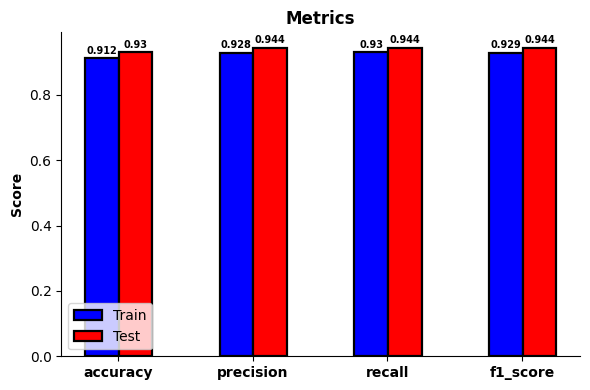

In [390]:
# We select 4 metrics to compare:
# accuracy,precision, recall y f1-score

metrics_plot(metrics_train_lr, metrics_test_lr, ['accuracy','precision','recall','f1_score'])

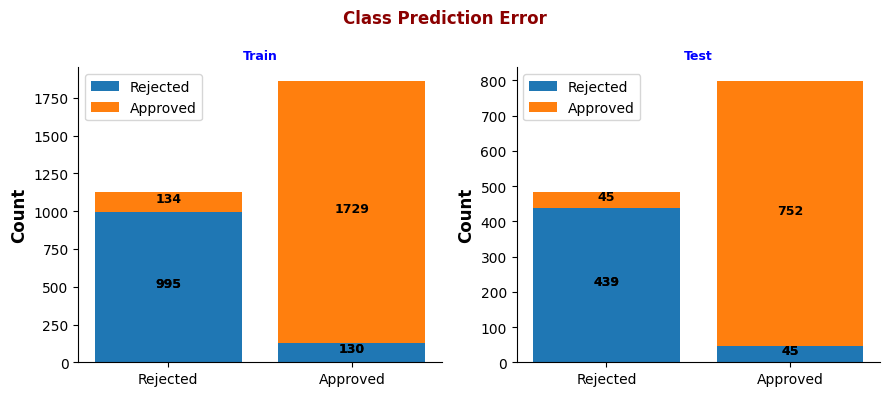

In [391]:
## Class prediction error
class_prediction_error(y_train, preds_train[names[0]],y_test, preds_test[names[0]],['Rejected','Approved'])

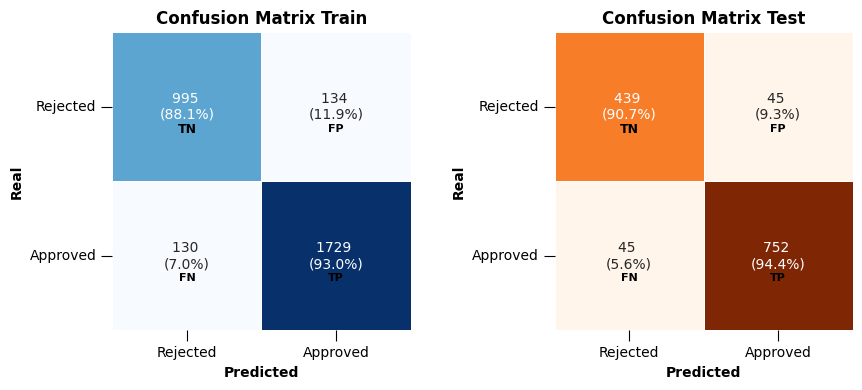

In [392]:
# Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[0]],
                      y_test, preds_test[names[0]])

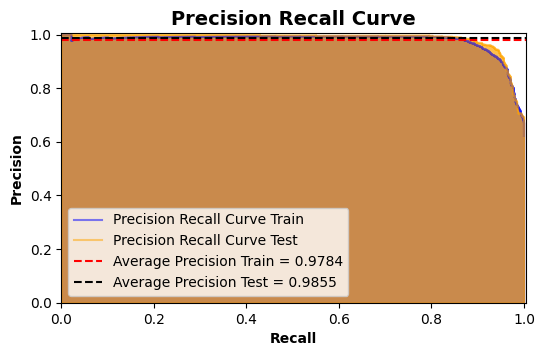

In [393]:
# Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train[names[0]],
                            y_test, preds_probs_test[names[0]])

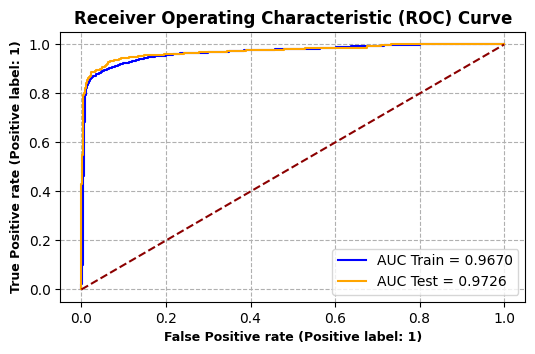

In [394]:
# ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[0]],
               y_test, preds_probs_test[names[0]])

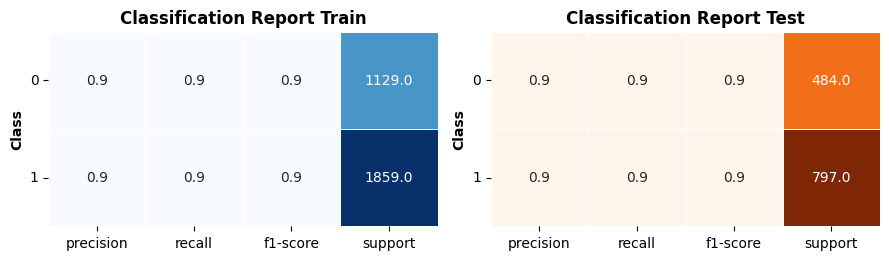

In [395]:
# Classification report
classification_report_plot(y_train, preds_train[names[0]],
                           y_test, preds_test[names[0]])

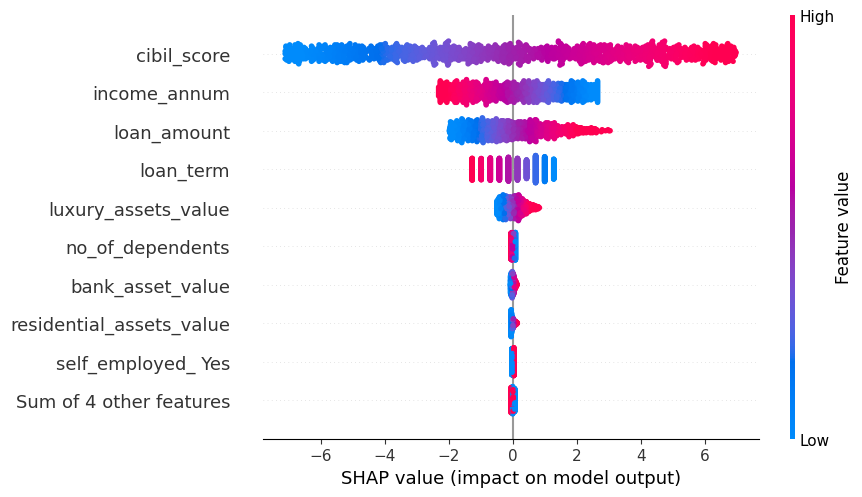

In [396]:
## Feature Importance
#==============================================================================
explainer_lr = shap.Explainer(list(models_trained.values())[0], X_train_prep_array, feature_names=X_train_prep.columns)
shap_values_lr = explainer_lr(X_test_prep_array)
shap.initjs()
shap.plots.beeswarm(shap_values_lr)

## **6.2 Random Forest**

In [397]:
## Métrics
metrics_train_rf = metrics_classification(y_train, preds_train[names[1]],
                                          preds_probs_train[names[1]])

metrics_test_rf = metrics_classification(y_test, preds_test[names[1]],
                                         preds_probs_test[names[1]])

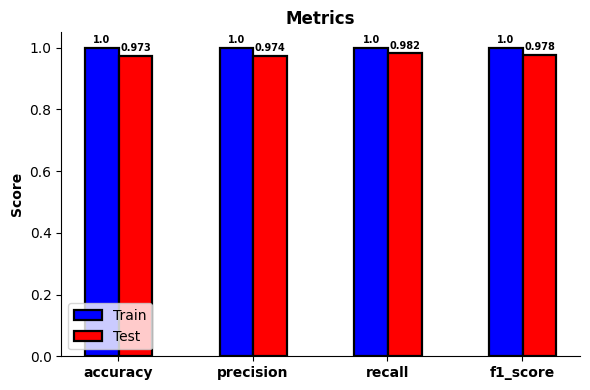

In [398]:
# We select 4 metrics to compare:
# accuracy, precision, recall y f1-score

metrics_plot(metrics_train_rf, metrics_test_rf, ['accuracy','precision','recall','f1_score'])

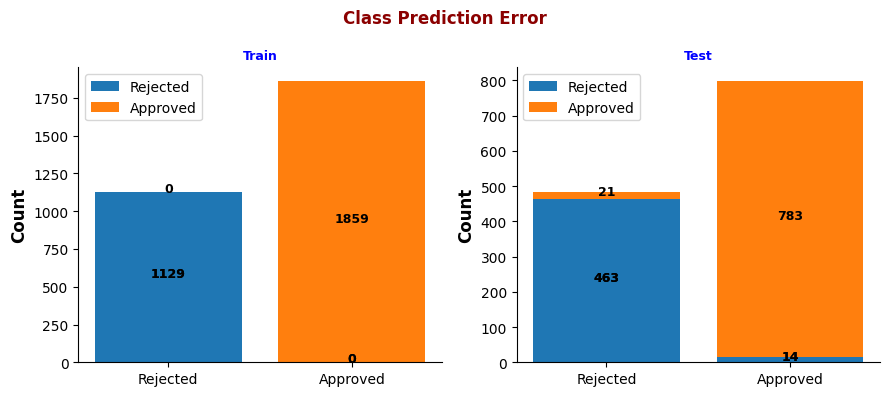

In [399]:
## Class prediction error
class_prediction_error(y_train, preds_train[names[1]],y_test, preds_test[names[1]],['Rejected','Approved'])

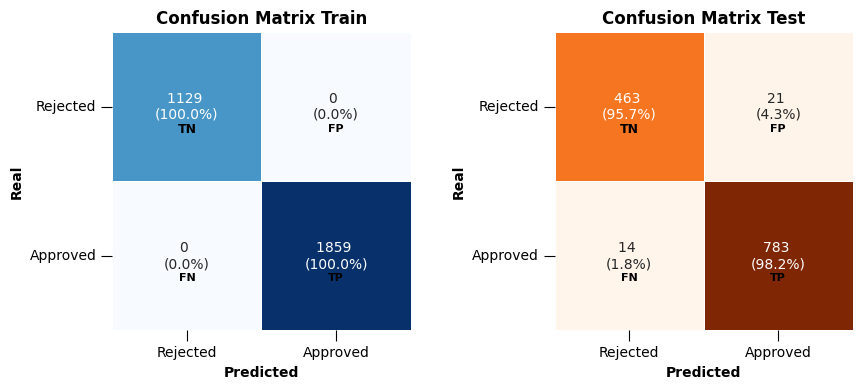

In [400]:
# Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[1]],
                      y_test, preds_test[names[1]])

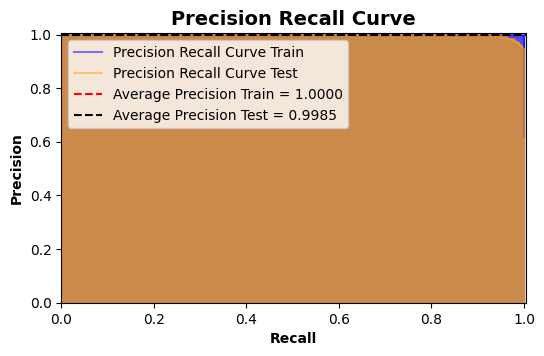

In [401]:
# Precision Recall Curve
precision_recall_curve_plot(y_train, preds_probs_train[names[1]],
                            y_test, preds_probs_test[names[1]])

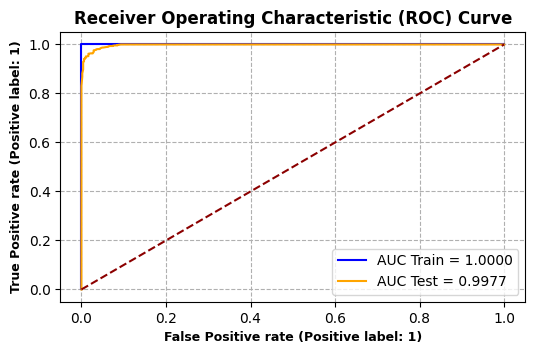

In [402]:
# ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[1]],
               y_test, preds_probs_test[names[1]])

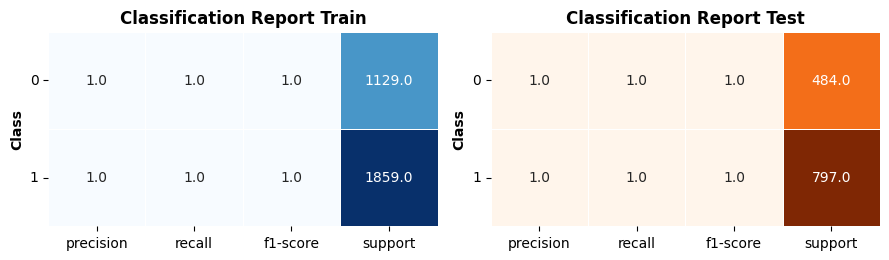

In [403]:
# Classification report
classification_report_plot(y_train, preds_train[names[1]],
                           y_test, preds_test[names[1]])

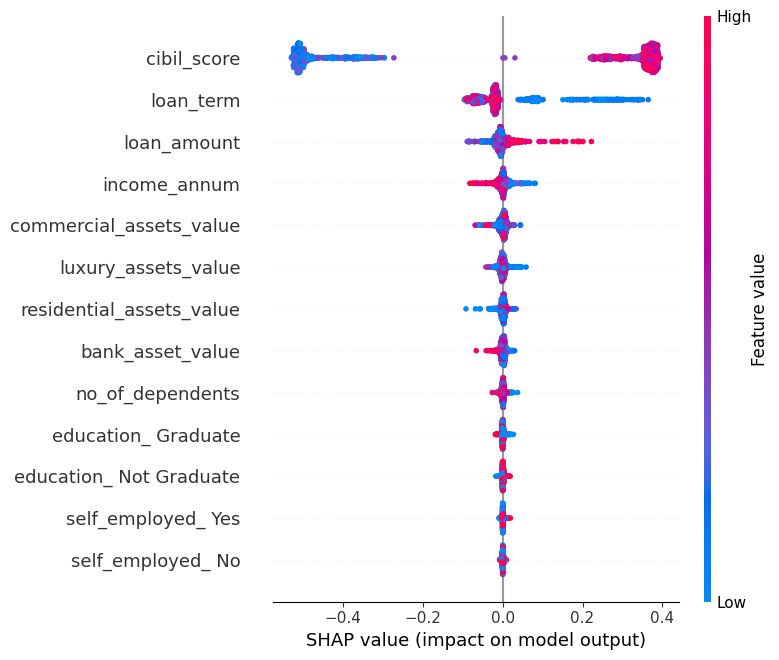

In [404]:
## Feature Importance
#===========================================================================
explainer_rf = shap.TreeExplainer(list(models_trained.values())[1])
shap_values_rf = explainer_rf.shap_values(X_test_prep_array)
shap.initjs()
shap.summary_plot(shap_values_rf[:, :, 1], # Select SHAP values for class 1 for all samples
                   X_test_prep, # Use the DataFrame for feature names
                   feature_names=X_test_prep.columns)

## **6.3 XGBoost**

In [405]:
## Métrics
metrics_train_xgb = metrics_classification(y_train, preds_train[names[2]],
                                          preds_probs_train[names[2]])

metrics_test_xgb = metrics_classification(y_test, preds_test[names[2]],
                                         preds_probs_test[names[2]])

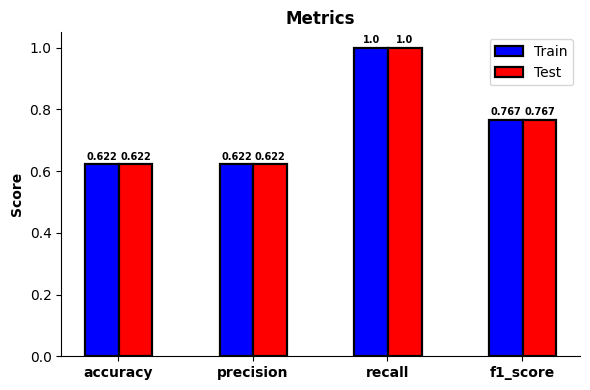

In [406]:
# We select 4 metrics to compare:
# accuracy, precision, recall y f1-score

metrics_plot(metrics_train_xgb, metrics_test_xgb, ['accuracy','precision','recall','f1_score'])

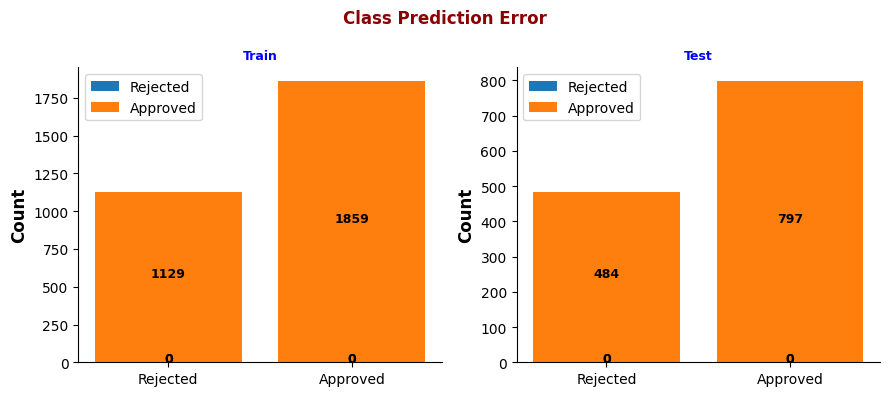

In [407]:
## Class prediction error
class_prediction_error(y_train, preds_train[names[2]],y_test, preds_test[names[2]],['Rejected','Approved'])

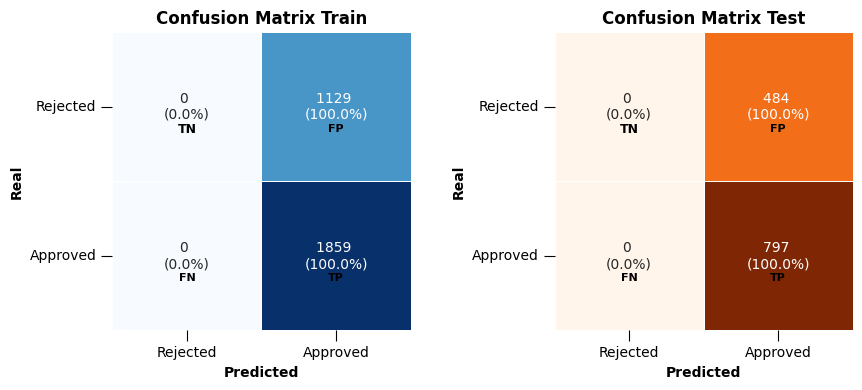

In [408]:
# Confusion Matrix
confusion_matrix_plot(y_train, preds_train[names[2]],
                      y_test, preds_test[names[2]])

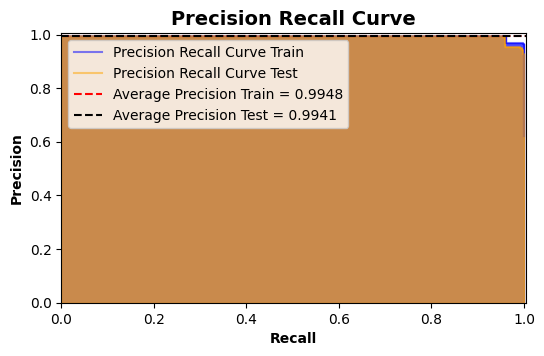

In [409]:
# Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train[names[2]],
                            y_test, preds_probs_test[names[2]])

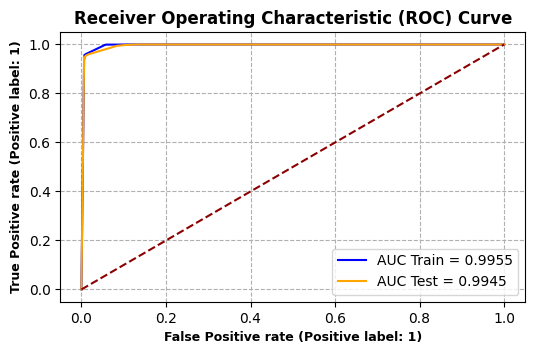

In [410]:
# ROC-AUC
roc_curve_plot(y_train, preds_probs_train[names[2]],
               y_test, preds_probs_test[names[2]])

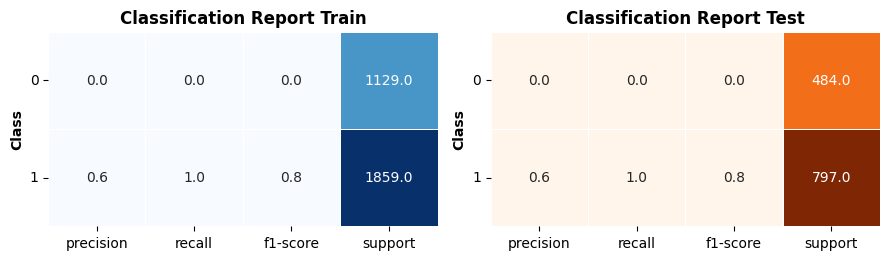

In [411]:
# Classification report
classification_report_plot(y_train, preds_train[names[2]],
                           y_test, preds_test[names[2]])

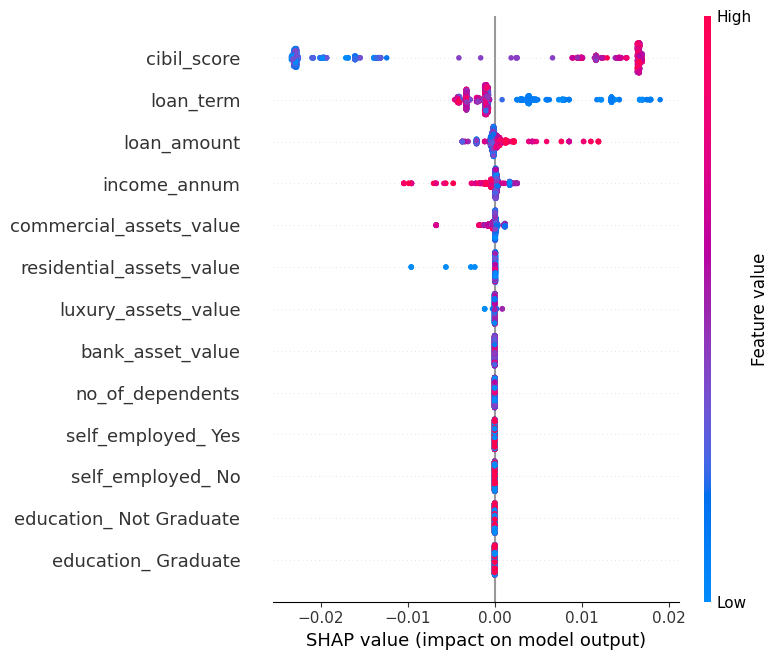

In [412]:
## Feature Importance
#===========================================================================
explainer_xgb = shap.TreeExplainer(list(models_trained.values())[2])
shap_values_xgb = explainer_xgb.shap_values(X_test_prep_array)
shap.initjs()
shap.summary_plot(shap_values_xgb,
                   X_test_prep_array, feature_names = X_test_prep.columns)

## **6.4 NNA(tensorflow)**

In [413]:
# we define our random seed
tf.random.set_seed(SEED)

# input layer
input_layer = Input(shape = (X_train_prep_array.shape[1],))

# fc1 layer
fc1 = Dense(10, activation = 'relu')(input_layer)
# dropout layer
drop1 = Dropout(rate=0.2, seed = SEED)(fc1)
# fc2 layer
fc2 = Dense(5, activation = 'relu')(drop1)
# output layer
output_layer = Dense(1, activation = 'sigmoid')(fc2)

# We define our model
model_nna = Model(input_layer, output_layer)

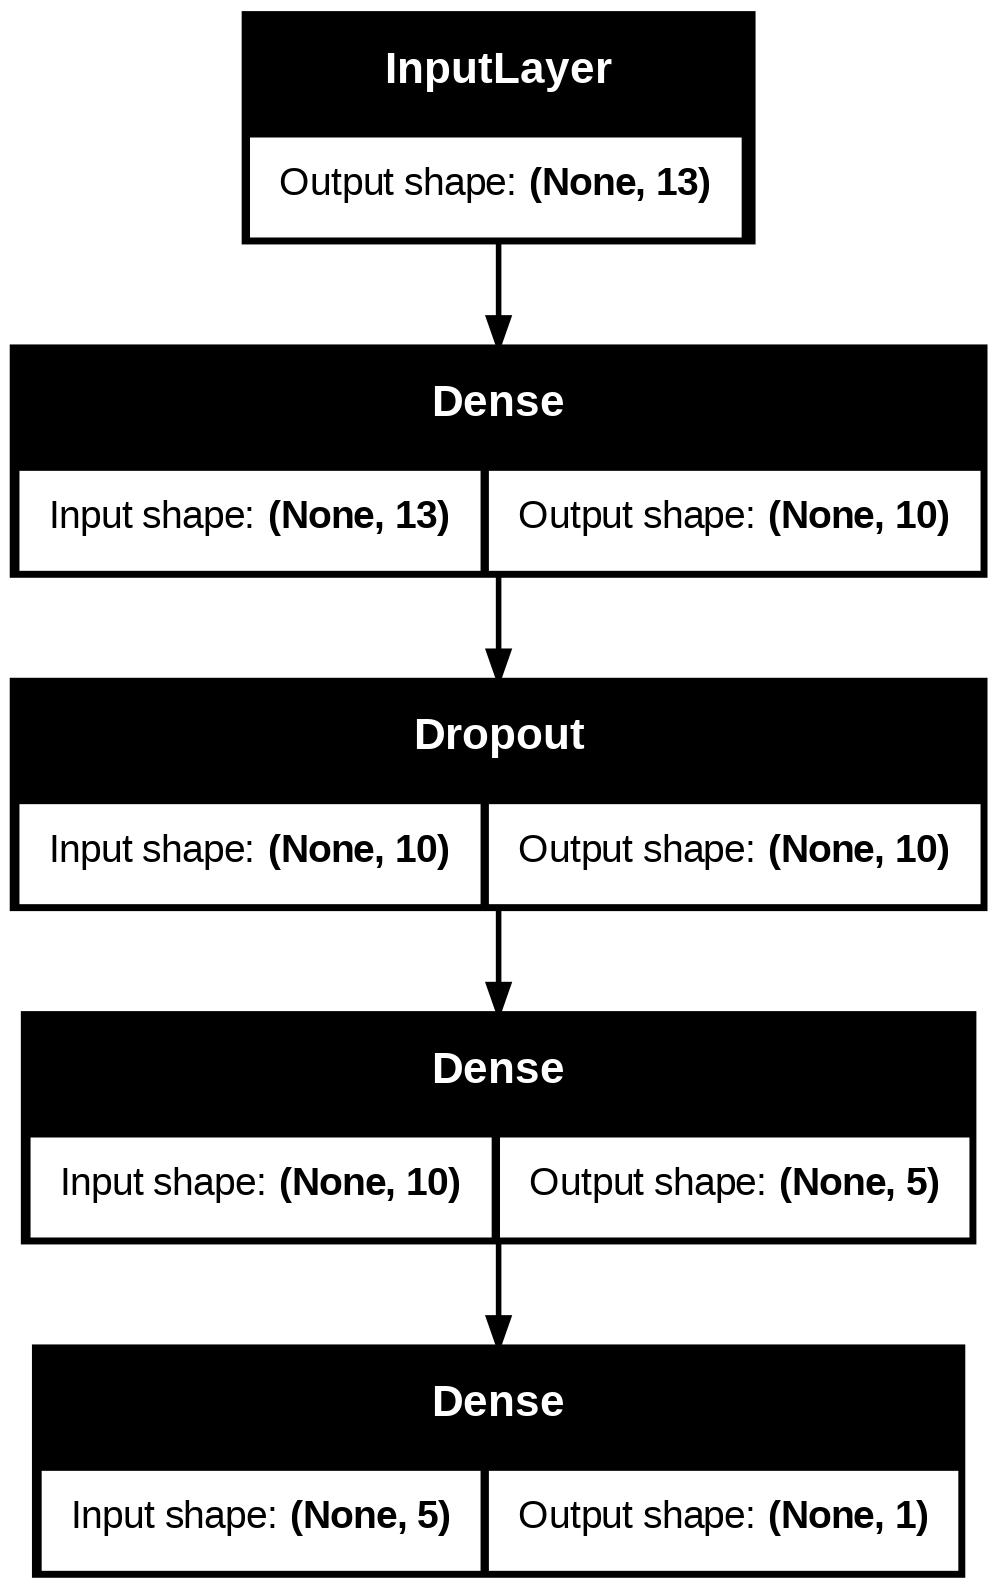

In [414]:
# we visualize our neural network
plot_model(model_nna, show_shapes = True)

In [415]:
# We define the metrics to evaluate.
metrics = [FalseNegatives(name = 'fn'),
           FalsePositives(name = 'fp'),
           TruePositives(name = 'tp'),
           TrueNegatives(name = 'tn'),
           Precision(name = 'precision'),
           Recall(name = 'recall'),
           BinaryAccuracy(name = 'accuracy', threshold = 0.5)] # 0.5 threshold for classification.

# We compile our model.
model_nna.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 10e-4, weight_decay = 0.5),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = metrics)

In [416]:
# We define our Callbacks.
model_checkpoint = ModelCheckpoint('best_model_nna.h5', monitor = 'val_loss', save_best_only = True)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5)

In [ ]:
## We train our model.

# We define our batch size.
BATCH_SIZE = 32

# We define the number of epochs.
EPOCHS = 200
history = model_nna.fit(X_train_prep_array,
                        y_train_array,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        verbose = 1,
                        callbacks = [model_checkpoint, early_stopping, reduce_lr],
                        validation_data = (X_test_prep_array, y_test_array))

Epoch 1/200
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5250 - fn: 315.4565 - fp: 367.8478 - loss: 0.6914 - precision: 0.6089 - recall: 0.6240 - tn: 205.4239 - tp: 599.2717

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5266 - fn: 322.9053 - fp: 378.7474 - loss: 0.6904 - precision: 0.6100 - recall: 0.6265 - tn: 212.0316 - tp: 621.5579 - val_accuracy: 0.6838 - val_fn: 106.0000 - val_fp: 299.0000 - val_loss: 0.5885 - val_precision: 0.6980 - val_recall: 0.8670 - val_tn: 185.0000 - val_tp: 691.0000 - learning_rate: 0.0010
Epoch 2/200
93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6944 - fn: 142.1183 - fp: 305.2151 - loss: 0.5841 - precision: 0.7127 - recall: 0.8392 - tn: 273.9893 - tp: 782.6774

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6950 - fn: 144.6000 - fp: 310.7474 - loss: 0.5835 - precision: 0.7132 - recall: 0.8397 - tn: 280.0316 - tp: 799.8632 - val_accuracy: 0.8181 - val_fn: 31.0000 - val_fp: 202.0000 - val_loss: 0.4663 - val_precision: 0.7913 - val_recall: 0.9611 - val_tn: 282.0000 - val_tp: 766.0000 - learning_rate: 0.0010
Epoch 3/200
91/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7809 - fn: 78.6374 - fp: 228.1319 - loss: 0.4797 - precision: 0.7715 - recall: 0.9132 - tn: 339.1758 - tp: 826.0549

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7820 - fn: 82.1263 - fp: 235.7474 - loss: 0.4784 - precision: 0.7729 - recall: 0.9132 - tn: 355.0316 - tp: 862.3369 - val_accuracy: 0.8798 - val_fn: 40.0000 - val_fp: 114.0000 - val_loss: 0.3595 - val_precision: 0.8691 - val_recall: 0.9498 - val_tn: 370.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 4/200
79/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - fn: 66.5570 - fp: 129.7975 - loss: 0.3902 - precision: 0.8439 - recall: 0.9164 - tn: 367.3038 - tp: 716.3418

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8470 - fn: 80.7053 - fp: 150.9684 - loss: 0.3862 - precision: 0.8469 - recall: 0.9160 - tn: 439.8105 - tp: 863.7579 - val_accuracy: 0.9110 - val_fn: 46.0000 - val_fp: 68.0000 - val_loss: 0.2904 - val_precision: 0.9170 - val_recall: 0.9423 - val_tn: 416.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 5/200
75/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8545 - fn: 69.0800 - fp: 102.5733 - loss: 0.3451 - precision: 0.8638 - recall: 0.9040 - tn: 371.1067 - tp: 673.2400

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8575 - fn: 85.9263 - fp: 125.2632 - loss: 0.3411 - precision: 0.8674 - recall: 0.9058 - tn: 465.5158 - tp: 858.5369 - val_accuracy: 0.9141 - val_fn: 46.0000 - val_fp: 64.0000 - val_loss: 0.2571 - val_precision: 0.9215 - val_recall: 0.9423 - val_tn: 420.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 6/200
75/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8881 - fn: 60.4000 - fp: 76.0000 - loss: 0.3038 - precision: 0.8989 - recall: 0.9198 - tn: 397.6800 - tp: 681.9200

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8887 - fn: 76.5895 - fp: 93.8421 - loss: 0.3014 - precision: 0.9006 - recall: 0.9197 - tn: 496.9368 - tp: 867.8737 - val_accuracy: 0.9196 - val_fn: 49.0000 - val_fp: 54.0000 - val_loss: 0.2358 - val_precision: 0.9327 - val_recall: 0.9385 - val_tn: 430.0000 - val_tp: 748.0000 - learning_rate: 0.0010
Epoch 7/200
76/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - fn: 67.8421 - fp: 58.1842 - loss: 0.2762 - precision: 0.9237 - recall: 0.9066 - tn: 421.3947 - tp: 684.5789

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8975 - fn: 83.9158 - fp: 72.6842 - loss: 0.2752 - precision: 0.9235 - recall: 0.9079 - tn: 518.0947 - tp: 860.5474 - val_accuracy: 0.9266 - val_fn: 45.0000 - val_fp: 49.0000 - val_loss: 0.2229 - val_precision: 0.9388 - val_recall: 0.9435 - val_tn: 435.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 8/200
77/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9097 - fn: 61.8312 - fp: 51.5584 - loss: 0.2623 - precision: 0.9309 - recall: 0.9202 - tn: 433.8961 - tp: 700.7143

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9095 - fn: 77.3263 - fp: 62.4000 - loss: 0.2605 - precision: 0.9318 - recall: 0.9195 - tn: 528.3790 - tp: 867.1368 - val_accuracy: 0.9329 - val_fn: 46.0000 - val_fp: 40.0000 - val_loss: 0.2116 - val_precision: 0.9494 - val_recall: 0.9423 - val_tn: 444.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 9/200
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - fn: 71.0625 - fp: 49.8750 - loss: 0.2603 - precision: 0.9348 - recall: 0.9078 - tn: 453.0500 - tp: 722.0125

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9058 - fn: 83.3368 - fp: 58.7263 - loss: 0.2584 - precision: 0.9353 - recall: 0.9089 - tn: 532.0526 - tp: 861.1263 - val_accuracy: 0.9368 - val_fn: 46.0000 - val_fp: 35.0000 - val_loss: 0.2041 - val_precision: 0.9555 - val_recall: 0.9423 - val_tn: 449.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 10/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9082 - fn: 80.2766 - fp: 59.7234 - loss: 0.2431 - precision: 0.9339 - recall: 0.9147 - tn: 525.3298 - tp: 854.4575

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9082 - fn: 81.0842 - fp: 60.2526 - loss: 0.2430 - precision: 0.9340 - recall: 0.9147 - tn: 530.5263 - tp: 863.3790 - val_accuracy: 0.9368 - val_fn: 46.0000 - val_fp: 35.0000 - val_loss: 0.1981 - val_precision: 0.9555 - val_recall: 0.9423 - val_tn: 449.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 11/200
76/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9093 - fn: 65.7763 - fp: 45.4079 - loss: 0.2395 - precision: 0.9398 - recall: 0.9096 - tn: 434.1711 - tp: 686.6447

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9103 - fn: 80.3053 - fp: 55.8421 - loss: 0.2381 - precision: 0.9401 - recall: 0.9115 - tn: 534.9368 - tp: 864.1579 - val_accuracy: 0.9375 - val_fn: 49.0000 - val_fp: 31.0000 - val_loss: 0.1937 - val_precision: 0.9602 - val_recall: 0.9385 - val_tn: 453.0000 - val_tp: 748.0000 - learning_rate: 0.0010
Epoch 12/200
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9173 - fn: 65.2750 - fp: 42.0000 - loss: 0.2290 - precision: 0.9460 - recall: 0.9169 - tn: 460.9250 - tp: 727.8000

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9176 - fn: 76.7684 - fp: 49.5684 - loss: 0.2279 - precision: 0.9462 - recall: 0.9176 - tn: 541.2105 - tp: 867.6948 - val_accuracy: 0.9407 - val_fn: 46.0000 - val_fp: 30.0000 - val_loss: 0.1874 - val_precision: 0.9616 - val_recall: 0.9423 - val_tn: 454.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 13/200
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - fn: 66.0455 - fp: 51.4886 - loss: 0.2276 - precision: 0.9375 - recall: 0.9262 - tn: 498.1136 - tp: 808.3523

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9172 - fn: 71.3474 - fp: 55.1368 - loss: 0.2272 - precision: 0.9380 - recall: 0.9260 - tn: 535.6421 - tp: 873.1158 - val_accuracy: 0.9454 - val_fn: 44.0000 - val_fp: 26.0000 - val_loss: 0.1850 - val_precision: 0.9666 - val_recall: 0.9448 - val_tn: 458.0000 - val_tp: 753.0000 - learning_rate: 0.0010
Epoch 14/200
77/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9142 - fn: 60.1818 - fp: 48.2468 - loss: 0.2274 - precision: 0.9355 - recall: 0.9229 - tn: 437.2078 - tp: 702.3636

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9142 - fn: 74.7158 - fp: 58.2421 - loss: 0.2260 - precision: 0.9364 - recall: 0.9225 - tn: 532.5369 - tp: 869.7474 - val_accuracy: 0.9446 - val_fn: 46.0000 - val_fp: 25.0000 - val_loss: 0.1810 - val_precision: 0.9678 - val_recall: 0.9423 - val_tn: 459.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 15/200
76/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9140 - fn: 62.6842 - fp: 41.8553 - loss: 0.2314 - precision: 0.9398 - recall: 0.9178 - tn: 437.7237 - tp: 689.7368

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9149 - fn: 77.6526 - fp: 50.5789 - loss: 0.2288 - precision: 0.9415 - recall: 0.9181 - tn: 540.2000 - tp: 866.8105 - val_accuracy: 0.9461 - val_fn: 44.0000 - val_fp: 25.0000 - val_loss: 0.1796 - val_precision: 0.9679 - val_recall: 0.9448 - val_tn: 459.0000 - val_tp: 753.0000 - learning_rate: 0.0010
Epoch 16/200
89/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9198 - fn: 71.7753 - fp: 40.5843 - loss: 0.2212 - precision: 0.9518 - recall: 0.9152 - tn: 514.9101 - tp: 812.7303

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9199 - fn: 76.3789 - fp: 43.2737 - loss: 0.2205 - precision: 0.9519 - recall: 0.9155 - tn: 547.5052 - tp: 868.0842 - val_accuracy: 0.9477 - val_fn: 43.0000 - val_fp: 24.0000 - val_loss: 0.1784 - val_precision: 0.9692 - val_recall: 0.9460 - val_tn: 460.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 17/200
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9309 - fn: 62.3977 - fp: 38.1364 - loss: 0.2158 - precision: 0.9558 - recall: 0.9300 - tn: 511.4659 - tp: 812.0000

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9308 - fn: 67.6000 - fp: 40.8737 - loss: 0.2152 - precision: 0.9559 - recall: 0.9298 - tn: 549.9053 - tp: 876.8632 - val_accuracy: 0.9454 - val_fn: 47.0000 - val_fp: 23.0000 - val_loss: 0.1758 - val_precision: 0.9702 - val_recall: 0.9410 - val_tn: 461.0000 - val_tp: 750.0000 - learning_rate: 0.0010
Epoch 18/200
82/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9252 - fn: 63.9146 - fp: 35.4024 - loss: 0.2235 - precision: 0.9562 - recall: 0.9196 - tn: 479.2195 - tp: 749.4634

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9254 - fn: 73.6421 - fp: 40.7158 - loss: 0.2215 - precision: 0.9563 - recall: 0.9202 - tn: 550.0632 - tp: 870.8210 - val_accuracy: 0.9477 - val_fn: 43.0000 - val_fp: 24.0000 - val_loss: 0.1742 - val_precision: 0.9692 - val_recall: 0.9460 - val_tn: 460.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 19/200
82/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9208 - fn: 65.3659 - fp: 35.3659 - loss: 0.2165 - precision: 0.9518 - recall: 0.9168 - tn: 479.2561 - tp: 748.0122

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9216 - fn: 75.0632 - fp: 40.3789 - loss: 0.2150 - precision: 0.9526 - recall: 0.9176 - tn: 550.4000 - tp: 869.4000 - val_accuracy: 0.9461 - val_fn: 46.0000 - val_fp: 23.0000 - val_loss: 0.1734 - val_precision: 0.9703 - val_recall: 0.9423 - val_tn: 461.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 20/200
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9199 - fn: 69.7625 - fp: 31.2000 - loss: 0.2150 - precision: 0.9574 - recall: 0.9093 - tn: 471.7250 - tp: 723.3125

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9210 - fn: 81.6737 - fp: 35.9684 - loss: 0.2135 - precision: 0.9583 - recall: 0.9105 - tn: 554.8105 - tp: 862.7895 - val_accuracy: 0.9461 - val_fn: 46.0000 - val_fp: 23.0000 - val_loss: 0.1707 - val_precision: 0.9703 - val_recall: 0.9423 - val_tn: 461.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 21/200
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9286 - fn: 65.4643 - fp: 32.5000 - loss: 0.2069 - precision: 0.9601 - recall: 0.9216 - tn: 493.7857 - tp: 768.2500

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9287 - fn: 74.0210 - fp: 36.2105 - loss: 0.2059 - precision: 0.9603 - recall: 0.9216 - tn: 554.5684 - tp: 870.4421 - val_accuracy: 0.9485 - val_fn: 43.0000 - val_fp: 23.0000 - val_loss: 0.1690 - val_precision: 0.9704 - val_recall: 0.9460 - val_tn: 461.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 22/200
83/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9367 - fn: 57.8434 - fp: 30.1566 - loss: 0.1979 - precision: 0.9641 - recall: 0.9310 - tn: 490.3133 - tp: 765.6868

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9362 - fn: 66.4632 - fp: 34.5368 - loss: 0.1975 - precision: 0.9638 - recall: 0.9308 - tn: 556.2421 - tp: 878.0000 - val_accuracy: 0.9485 - val_fn: 47.0000 - val_fp: 19.0000 - val_loss: 0.1653 - val_precision: 0.9753 - val_recall: 0.9410 - val_tn: 465.0000 - val_tp: 750.0000 - learning_rate: 0.0010
Epoch 23/200
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - fn: 69.3696 - fp: 30.5978 - loss: 0.2015 - precision: 0.9675 - recall: 0.9259 - tn: 542.6739 - tp: 845.3587

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9355 - fn: 71.6316 - fp: 31.5579 - loss: 0.2013 - precision: 0.9674 - recall: 0.9259 - tn: 559.2211 - tp: 872.8316 - val_accuracy: 0.9485 - val_fn: 45.0000 - val_fp: 21.0000 - val_loss: 0.1648 - val_precision: 0.9728 - val_recall: 0.9435 - val_tn: 463.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 24/200
83/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9280 - fn: 60.9277 - fp: 35.7108 - loss: 0.2039 - precision: 0.9567 - recall: 0.9241 - tn: 484.7590 - tp: 762.6024

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9283 - fn: 69.9895 - fp: 39.3474 - loss: 0.2028 - precision: 0.9574 - recall: 0.9242 - tn: 551.4316 - tp: 874.4737 - val_accuracy: 0.9469 - val_fn: 45.0000 - val_fp: 23.0000 - val_loss: 0.1641 - val_precision: 0.9703 - val_recall: 0.9435 - val_tn: 461.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 25/200
78/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9242 - fn: 57.8718 - fp: 35.0128 - loss: 0.2076 - precision: 0.9512 - recall: 0.9231 - tn: 456.2564 - tp: 714.8589

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9254 - fn: 70.2526 - fp: 40.3684 - loss: 0.2052 - precision: 0.9530 - recall: 0.9237 - tn: 550.4105 - tp: 874.2105 - val_accuracy: 0.9485 - val_fn: 45.0000 - val_fp: 21.0000 - val_loss: 0.1622 - val_precision: 0.9728 - val_recall: 0.9435 - val_tn: 463.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 26/200
77/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9198 - fn: 61.6883 - fp: 36.8442 - loss: 0.2048 - precision: 0.9509 - recall: 0.9159 - tn: 448.6104 - tp: 700.8571

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9204 - fn: 76.1368 - fp: 44.0105 - loss: 0.2031 - precision: 0.9517 - recall: 0.9167 - tn: 546.7684 - tp: 868.3263 - val_accuracy: 0.9493 - val_fn: 44.0000 - val_fp: 21.0000 - val_loss: 0.1611 - val_precision: 0.9729 - val_recall: 0.9448 - val_tn: 463.0000 - val_tp: 753.0000 - learning_rate: 0.0010
Epoch 27/200
78/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9390 - fn: 54.5769 - fp: 23.7564 - loss: 0.1936 - precision: 0.9702 - recall: 0.9285 - tn: 467.5128 - tp: 718.1539

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9388 - fn: 66.2737 - fp: 28.8526 - loss: 0.1923 - precision: 0.9699 - recall: 0.9289 - tn: 561.9263 - tp: 878.1895 - val_accuracy: 0.9485 - val_fn: 45.0000 - val_fp: 21.0000 - val_loss: 0.1597 - val_precision: 0.9728 - val_recall: 0.9435 - val_tn: 463.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 28/200
82/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9313 - fn: 61.2073 - fp: 33.7805 - loss: 0.1946 - precision: 0.9597 - recall: 0.9263 - tn: 480.8415 - tp: 752.1707

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9311 - fn: 70.8737 - fp: 38.2842 - loss: 0.1939 - precision: 0.9599 - recall: 0.9262 - tn: 552.4948 - tp: 873.5895 - val_accuracy: 0.9493 - val_fn: 45.0000 - val_fp: 20.0000 - val_loss: 0.1595 - val_precision: 0.9741 - val_recall: 0.9435 - val_tn: 464.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 29/200
91/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9358 - fn: 60.0549 - fp: 35.9451 - loss: 0.1997 - precision: 0.9599 - recall: 0.9341 - tn: 531.3626 - tp: 844.6374

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9358 - fn: 62.8526 - fp: 37.2105 - loss: 0.1992 - precision: 0.9601 - recall: 0.9340 - tn: 553.5684 - tp: 881.6105 - val_accuracy: 0.9516 - val_fn: 45.0000 - val_fp: 17.0000 - val_loss: 0.1569 - val_precision: 0.9779 - val_recall: 0.9435 - val_tn: 467.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 30/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9349 - fn: 65.3684 - fp: 36.9368 - loss: 0.1900 - precision: 0.9618 - recall: 0.9308 - tn: 553.8421 - tp: 879.0947 - val_accuracy: 0.9500 - val_fn: 46.0000 - val_fp: 18.0000 - val_loss: 0.1579 - val_precision: 0.9766 - val_recall: 0.9423 - val_tn: 466.0000 - val_tp: 751.0000 - learning_rate: 0.0010
Epoch 31/200
79/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - fn: 52.5443 - fp: 24.4557 - loss: 0.1944 - precision: 0.9672 - recall: 0.9346 - tn: 472.6456 - tp: 730.3544

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9405 - fn: 63.5053 - fp: 29.2105 - loss: 0.1928 - precision: 0.9674 - recall: 0.9343 - tn: 561.5684 - tp: 880.9579 - val_accuracy: 0.9485 - val_fn: 48.0000 - val_fp: 18.0000 - val_loss: 0.1557 - val_precision: 0.9765 - val_recall: 0.9398 - val_tn: 466.0000 - val_tp: 749.0000 - learning_rate: 0.0010
Epoch 32/200
81/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9239 - fn: 62.7160 - fp: 31.2593 - loss: 0.1934 - precision: 0.9598 - recall: 0.9138 - tn: 477.4938 - tp: 740.5309

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9251 - fn: 72.7474 - fp: 35.6737 - loss: 0.1918 - precision: 0.9604 - recall: 0.9156 - tn: 555.1053 - tp: 871.7158 - val_accuracy: 0.9500 - val_fn: 43.0000 - val_fp: 21.0000 - val_loss: 0.1541 - val_precision: 0.9729 - val_recall: 0.9460 - val_tn: 463.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 33/200
90/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - fn: 61.8556 - fp: 24.4222 - loss: 0.1839 - precision: 0.9747 - recall: 0.9318 - tn: 536.9667 - tp: 832.7556

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9432 - fn: 65.3368 - fp: 25.8632 - loss: 0.1837 - precision: 0.9745 - recall: 0.9317 - tn: 564.9158 - tp: 879.1263 - val_accuracy: 0.9524 - val_fn: 43.0000 - val_fp: 18.0000 - val_loss: 0.1534 - val_precision: 0.9767 - val_recall: 0.9460 - val_tn: 466.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 34/200
90/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - fn: 61.6000 - fp: 32.6556 - loss: 0.1877 - precision: 0.9615 - recall: 0.9299 - tn: 528.7333 - tp: 833.0111

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9344 - fn: 65.0737 - fp: 33.9789 - loss: 0.1872 - precision: 0.9618 - recall: 0.9299 - tn: 556.8000 - tp: 879.3895 - val_accuracy: 0.9500 - val_fn: 43.0000 - val_fp: 21.0000 - val_loss: 0.1527 - val_precision: 0.9729 - val_recall: 0.9460 - val_tn: 463.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 35/200
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9348 - fn: 60.5000 - fp: 28.9643 - loss: 0.1884 - precision: 0.9651 - recall: 0.9269 - tn: 497.3214 - tp: 773.2143

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9349 - fn: 68.3579 - fp: 32.1789 - loss: 0.1875 - precision: 0.9653 - recall: 0.9271 - tn: 558.6000 - tp: 876.1053 - val_accuracy: 0.9524 - val_fn: 41.0000 - val_fp: 20.0000 - val_loss: 0.1519 - val_precision: 0.9742 - val_recall: 0.9486 - val_tn: 464.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 36/200
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - fn: 70.1477 - fp: 26.2614 - loss: 0.1893 - precision: 0.9666 - recall: 0.9152 - tn: 523.3409 - tp: 804.2500

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9295 - fn: 74.6526 - fp: 28.1053 - loss: 0.1886 - precision: 0.9669 - recall: 0.9162 - tn: 562.6737 - tp: 869.8105 - val_accuracy: 0.9532 - val_fn: 41.0000 - val_fp: 19.0000 - val_loss: 0.1518 - val_precision: 0.9755 - val_recall: 0.9486 - val_tn: 465.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 37/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9343 - fn: 70.8105 - fp: 31.0947 - loss: 0.1866 - precision: 0.9672 - recall: 0.9242 - tn: 559.6842 - tp: 873.6526 - val_accuracy: 0.9524 - val_fn: 43.0000 - val_fp: 18.0000 - val_loss: 0.1521 - val_precision: 0.9767 - val_recall: 0.9460 - val_tn: 466.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 38/200
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9287 - fn: 64.9881 - fp: 31.1190 - loss: 0.1939 - precision: 0.9613 - recall: 0.9205 - tn: 495.1667 - tp: 768.7262

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9293 - fn: 72.9263 - fp: 34.1158 - loss: 0.1925 - precision: 0.9619 - recall: 0.9211 - tn: 556.6631 - tp: 871.5369 - val_accuracy: 0.9508 - val_fn: 45.0000 - val_fp: 18.0000 - val_loss: 0.1499 - val_precision: 0.9766 - val_recall: 0.9435 - val_tn: 466.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 39/200
89/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - fn: 61.0787 - fp: 32.5393 - loss: 0.1812 - precision: 0.9633 - recall: 0.9309 - tn: 522.9551 - tp: 823.4269

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9361 - fn: 65.3158 - fp: 34.1895 - loss: 0.1808 - precision: 0.9635 - recall: 0.9308 - tn: 556.5895 - tp: 879.1473 - val_accuracy: 0.9524 - val_fn: 43.0000 - val_fp: 18.0000 - val_loss: 0.1491 - val_precision: 0.9767 - val_recall: 0.9460 - val_tn: 466.0000 - val_tp: 754.0000 - learning_rate: 0.0010
Epoch 40/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9317 - fn: 68.4105 - fp: 32.0737 - loss: 0.1904 - precision: 0.9643 - recall: 0.9228 - tn: 558.7053 - tp: 876.0526 - val_accuracy: 0.9524 - val_fn: 42.0000 - val_fp: 19.0000 - val_loss: 0.1504 - val_precision: 0.9755 - val_recall: 0.9473 - val_tn: 465.0000 - val_tp: 755.0000 - learning_rate: 0.0010
Epoch 41/200
81/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9419 - fn: 54.5062 - fp: 23.8025 - loss: 0.1808 - precision: 0.9699 - recall: 0.9337 - tn: 484.9506 - tp: 748.7407

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9416 - fn: 64.5158 - fp: 27.3263 - loss: 0.1801 - precision: 0.9702 - recall: 0.9332 - tn: 563.4526 - tp: 879.9474 - val_accuracy: 0.9524 - val_fn: 42.0000 - val_fp: 19.0000 - val_loss: 0.1485 - val_precision: 0.9755 - val_recall: 0.9473 - val_tn: 465.0000 - val_tp: 755.0000 - learning_rate: 0.0010
Epoch 42/200
89/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9362 - fn: 59.4831 - fp: 32.3146 - loss: 0.1823 - precision: 0.9635 - recall: 0.9310 - tn: 523.1797 - tp: 825.0225

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9362 - fn: 63.2421 - fp: 34.4211 - loss: 0.1819 - precision: 0.9635 - recall: 0.9312 - tn: 556.3579 - tp: 881.2211 - val_accuracy: 0.9532 - val_fn: 44.0000 - val_fp: 16.0000 - val_loss: 0.1479 - val_precision: 0.9792 - val_recall: 0.9448 - val_tn: 468.0000 - val_tp: 753.0000 - learning_rate: 0.0010
Epoch 43/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9253 - fn: 72.7895 - fp: 34.2632 - loss: 0.1909 - precision: 0.9614 - recall: 0.9149 - tn: 556.5158 - tp: 871.6737 - val_accuracy: 0.9508 - val_fn: 45.0000 - val_fp: 18.0000 - val_loss: 0.1486 - val_precision: 0.9766 - val_recall: 0.9435 - val_tn: 466.0000 - val_tp: 752.0000 - learning_rate: 0.0010
Epoch 44/200
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9365 - fn: 64.6413 - fp: 30.3913 - loss: 0.1824 - precision: 0.9662 - recall: 0.9289 - tn: 542.8804 - tp: 850.0870

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9365 - fn: 66.6421 - fp: 31.1684 - loss: 0.1822 - precision: 0.9663 - recall: 0.9290 - tn: 559.6105 - tp: 877.8210 - val_accuracy: 0.9532 - val_fn: 41.0000 - val_fp: 19.0000 - val_loss: 0.1479 - val_precision: 0.9755 - val_recall: 0.9486 - val_tn: 465.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 45/200
77/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9368 - fn: 51.1948 - fp: 26.1169 - loss: 0.1774 - precision: 0.9637 - recall: 0.9316 - tn: 459.3377 - tp: 711.3506

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9372 - fn: 63.7579 - fp: 31.0211 - loss: 0.1767 - precision: 0.9647 - recall: 0.9316 - tn: 559.7579 - tp: 880.7053 - val_accuracy: 0.9532 - val_fn: 41.0000 - val_fp: 19.0000 - val_loss: 0.1471 - val_precision: 0.9755 - val_recall: 0.9486 - val_tn: 465.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 46/200
90/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9373 - fn: 60.8556 - fp: 29.6222 - loss: 0.1856 - precision: 0.9647 - recall: 0.9317 - tn: 531.7667 - tp: 833.7556

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9374 - fn: 64.3474 - fp: 30.8211 - loss: 0.1850 - precision: 0.9650 - recall: 0.9316 - tn: 559.9579 - tp: 880.1158 - val_accuracy: 0.9516 - val_fn: 42.0000 - val_fp: 20.0000 - val_loss: 0.1457 - val_precision: 0.9742 - val_recall: 0.9473 - val_tn: 464.0000 - val_tp: 755.0000 - learning_rate: 0.0010
Epoch 47/200
79/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - fn: 54.7722 - fp: 28.8354 - loss: 0.1778 - precision: 0.9614 - recall: 0.9294 - tn: 468.2658 - tp: 728.1266

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9351 - fn: 64.4737 - fp: 33.4421 - loss: 0.1769 - precision: 0.9623 - recall: 0.9304 - tn: 557.3369 - tp: 879.9895 - val_accuracy: 0.9539 - val_fn: 42.0000 - val_fp: 17.0000 - val_loss: 0.1450 - val_precision: 0.9780 - val_recall: 0.9473 - val_tn: 467.0000 - val_tp: 755.0000 - learning_rate: 0.0010
Epoch 48/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9350 - fn: 66.5789 - fp: 29.0947 - loss: 0.1857 - precision: 0.9692 - recall: 0.9233 - tn: 561.6842 - tp: 877.8842 - val_accuracy: 0.9500 - val_fn: 44.0000 - val_fp: 20.0000 - val_loss: 0.1459 - val_precision: 0.9741 - val_recall: 0.9448 - val_tn: 464.0000 - val_tp: 753.0000 - learning_rate: 0.0010
Epoch 49/200
91/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9331 - fn: 64.5934 - fp: 30.2308 - loss: 0.1769 - precision: 0.9639 - recall: 0.9253 - tn: 537.0769 - tp: 840.0989

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9333 - fn: 67.3158 - fp: 31.2316 - loss: 0.1767 - precision: 0.9641 - recall: 0.9255 - tn: 559.5474 - tp: 877.1473 - val_accuracy: 0.9524 - val_fn: 44.0000 - val_fp: 17.0000 - val_loss: 0.1444 - val_precision: 0.9779 - val_recall: 0.9448 - val_tn: 467.0000 - val_tp: 753.0000 - learning_rate: 0.0010
Epoch 50/200
93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9421 - fn: 59.6344 - fp: 28.0753 - loss: 0.1754 - precision: 0.9699 - recall: 0.9346 - tn: 551.1290 - tp: 865.1613

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9421 - fn: 60.9474 - fp: 28.6211 - loss: 0.1753 - precision: 0.9699 - recall: 0.9346 - tn: 562.1579 - tp: 883.5158 - val_accuracy: 0.9532 - val_fn: 42.0000 - val_fp: 18.0000 - val_loss: 0.1435 - val_precision: 0.9767 - val_recall: 0.9473 - val_tn: 466.0000 - val_tp: 755.0000 - learning_rate: 0.0010
Epoch 51/200
77/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9402 - fn: 49.5974 - fp: 26.4805 - loss: 0.1785 - precision: 0.9645 - recall: 0.9366 - tn: 458.9740 - tp: 712.9481

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9403 - fn: 61.2842 - fp: 31.6316 - loss: 0.1773 - precision: 0.9651 - recall: 0.9363 - tn: 559.1473 - tp: 883.1790 - val_accuracy: 0.9563 - val_fn: 41.0000 - val_fp: 15.0000 - val_loss: 0.1429 - val_precision: 0.9805 - val_recall: 0.9486 - val_tn: 469.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 52/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9327 - fn: 68.3579 - fp: 32.3474 - loss: 0.1858 - precision: 0.9642 - recall: 0.9245 - tn: 558.4316 - tp: 876.1053 - val_accuracy: 0.9555 - val_fn: 40.0000 - val_fp: 17.0000 - val_loss: 0.1444 - val_precision: 0.9780 - val_recall: 0.9498 - val_tn: 467.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 53/200
73/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9404 - fn: 42.6027 - fp: 25.2192 - loss: 0.1772 - precision: 0.9627 - recall: 0.9386 - tn: 436.7260 - tp: 679.4520

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9413 - fn: 55.8211 - fp: 31.2421 - loss: 0.1748 - precision: 0.9641 - recall: 0.9391 - tn: 559.5369 - tp: 888.6421 - val_accuracy: 0.9547 - val_fn: 41.0000 - val_fp: 17.0000 - val_loss: 0.1419 - val_precision: 0.9780 - val_recall: 0.9486 - val_tn: 467.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 54/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9376 - fn: 65.6842 - fp: 29.0211 - loss: 0.1730 - precision: 0.9690 - recall: 0.9279 - tn: 561.7579 - tp: 878.7789 - val_accuracy: 0.9508 - val_fn: 42.0000 - val_fp: 21.0000 - val_loss: 0.1423 - val_precision: 0.9729 - val_recall: 0.9473 - val_tn: 463.0000 - val_tp: 755.0000 - learning_rate: 0.0010
Epoch 55/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9370 - fn: 58.8632 - fp: 33.4737 - loss: 0.1820 - precision: 0.9617 - recall: 0.9343 - tn: 557.3052 - tp: 885.6000 - val_accuracy: 0.9516 - val_fn: 41.0000 - val_fp: 21.0000 - val_loss: 0.1422 - val_precision: 0.973

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9444 - fn: 57.1053 - fp: 28.3368 - loss: 0.1800 - precision: 0.9695 - recall: 0.9387 - tn: 562.4421 - tp: 887.3579 - val_accuracy: 0.9555 - val_fn: 40.0000 - val_fp: 17.0000 - val_loss: 0.1410 - val_precision: 0.9780 - val_recall: 0.9498 - val_tn: 467.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 57/200
86/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9398 - fn: 55.4535 - fp: 27.9186 - loss: 0.1789 - precision: 0.9666 - recall: 0.9340 - tn: 510.0116 - tp: 798.6163

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9399 - fn: 61.3895 - fp: 30.4211 - loss: 0.1781 - precision: 0.9668 - recall: 0.9340 - tn: 560.3579 - tp: 883.0737 - val_accuracy: 0.9539 - val_fn: 39.0000 - val_fp: 20.0000 - val_loss: 0.1409 - val_precision: 0.9743 - val_recall: 0.9511 - val_tn: 464.0000 - val_tp: 758.0000 - learning_rate: 0.0010
Epoch 58/200
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9385 - fn: 56.5287 - fp: 28.9540 - loss: 0.1747 - precision: 0.9650 - recall: 0.9332 - tn: 514.8046 - tp: 807.7126

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9388 - fn: 61.4632 - fp: 30.9789 - loss: 0.1738 - precision: 0.9654 - recall: 0.9335 - tn: 559.8000 - tp: 883.0000 - val_accuracy: 0.9555 - val_fn: 40.0000 - val_fp: 17.0000 - val_loss: 0.1399 - val_precision: 0.9780 - val_recall: 0.9498 - val_tn: 467.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 59/200
82/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9412 - fn: 52.8293 - fp: 23.5610 - loss: 0.1747 - precision: 0.9696 - recall: 0.9330 - tn: 491.0610 - tp: 760.5488

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9414 - fn: 61.2526 - fp: 26.8947 - loss: 0.1736 - precision: 0.9699 - recall: 0.9333 - tn: 563.8842 - tp: 883.2105 - val_accuracy: 0.9555 - val_fn: 40.0000 - val_fp: 17.0000 - val_loss: 0.1398 - val_precision: 0.9780 - val_recall: 0.9498 - val_tn: 467.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 60/200
84/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9410 - fn: 50.2143 - fp: 28.2738 - loss: 0.1713 - precision: 0.9642 - recall: 0.9384 - tn: 498.0119 - tp: 783.5000

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9413 - fn: 56.8421 - fp: 31.5789 - loss: 0.1705 - precision: 0.9646 - recall: 0.9386 - tn: 559.2000 - tp: 887.6210 - val_accuracy: 0.9578 - val_fn: 40.0000 - val_fp: 14.0000 - val_loss: 0.1376 - val_precision: 0.9818 - val_recall: 0.9498 - val_tn: 470.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 61/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9459 - fn: 58.3684 - fp: 25.3368 - loss: 0.1669 - precision: 0.9733 - recall: 0.9375 - tn: 565.4421 - tp: 886.0947 - val_accuracy: 0.9571 - val_fn: 40.0000 - val_fp: 15.0000 - val_loss: 0.1380 - val_precision: 0.9806 - val_recall: 0.9498 - val_tn: 469.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 62/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9380 - fn: 67.4526 - fp: 25.3579 - loss: 0.1805 - precision: 0.9713 - recall: 0.9261 - tn: 565.4211 - tp: 877.0105 - val_accuracy: 0.9555 - val_fn: 39.0000 - val_fp: 18.0000 - val_loss: 0.1387 - val_precision: 0.976

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9403 - fn: 60.9579 - fp: 30.6737 - loss: 0.1656 - precision: 0.9676 - recall: 0.9338 - tn: 560.1053 - tp: 883.5052 - val_accuracy: 0.9563 - val_fn: 41.0000 - val_fp: 15.0000 - val_loss: 0.1369 - val_precision: 0.9805 - val_recall: 0.9486 - val_tn: 469.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 66/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9418 - fn: 60.7053 - fp: 28.7368 - loss: 0.1718 - precision: 0.9687 - recall: 0.9352 - tn: 562.0421 - tp: 883.7579 - val_accuracy: 0.9539 - val_fn: 39.0000 - val_fp: 20.0000 - val_loss: 0.1383 - val_precision: 0.9743 - val_recall: 0.9511 - val_tn: 464.0000 - val_tp: 758.0000 - learning_rate: 0.0010
Epoch 67/200
80/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9405 - fn: 48.2250 - fp: 28.0375 - loss: 0.1744 - precision: 0.9627 - recall: 0.9389 - tn: 474.8875 - tp: 744.8500

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9406 - fn: 57.9895 - fp: 32.3895 - loss: 0.1729 - precision: 0.9634 - recall: 0.9386 - tn: 558.3895 - tp: 886.4737 - val_accuracy: 0.9563 - val_fn: 38.0000 - val_fp: 18.0000 - val_loss: 0.1368 - val_precision: 0.9768 - val_recall: 0.9523 - val_tn: 466.0000 - val_tp: 759.0000 - learning_rate: 0.0010
Epoch 68/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9427 - fn: 58.1789 - fp: 28.2105 - loss: 0.1692 - precision: 0.9696 - recall: 0.9358 - tn: 562.5684 - tp: 886.2842 - val_accuracy: 0.9555 - val_fn: 40.0000 - val_fp: 17.0000 - val_loss: 0.1369 - val_precision: 0.9780 - val_recall: 0.9498 - val_tn: 467.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 69/200
74/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - fn: 45.6081 - fp: 21.8649 - loss: 0.1731 - precision: 0.9684 - recall: 0.9357 - tn: 445.9595 - tp: 686.5676

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9430 - fn: 58.1263 - fp: 26.9579 - loss: 0.1719 - precision: 0.9693 - recall: 0.9366 - tn: 563.8210 - tp: 886.3369 - val_accuracy: 0.9547 - val_fn: 42.0000 - val_fp: 16.0000 - val_loss: 0.1363 - val_precision: 0.9792 - val_recall: 0.9473 - val_tn: 468.0000 - val_tp: 755.0000 - learning_rate: 0.0010
Epoch 70/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9363 - fn: 65.3789 - fp: 30.7263 - loss: 0.1781 - precision: 0.9658 - recall: 0.9289 - tn: 560.0526 - tp: 879.0842 - val_accuracy: 0.9563 - val_fn: 38.0000 - val_fp: 18.0000 - val_loss: 0.1374 - val_precision: 0.9768 - val_recall: 0.9523 - val_tn: 466.0000 - val_tp: 759.0000 - learning_rate: 0.0010
Epoch 71/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9421 - fn: 59.1158 - fp: 29.7263 - loss: 0.1688 - precision: 0.9664 - recall: 0.9381 - tn: 561.0526 - tp: 885.3474 - val_accuracy: 0.9555 - val_fn: 40.0000 - val_fp: 17.0000 - val_loss: 0.1368 - val_precision: 0.978

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9429 - fn: 57.3053 - fp: 29.7053 - loss: 0.1647 - precision: 0.9676 - recall: 0.9382 - tn: 561.0737 - tp: 887.1579 - val_accuracy: 0.9578 - val_fn: 36.0000 - val_fp: 18.0000 - val_loss: 0.1362 - val_precision: 0.9769 - val_recall: 0.9548 - val_tn: 466.0000 - val_tp: 761.0000 - learning_rate: 0.0010
Epoch 73/200
77/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - fn: 46.5065 - fp: 26.4026 - loss: 0.1803 - precision: 0.9636 - recall: 0.9351 - tn: 459.0519 - tp: 716.0389

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9399 - fn: 56.7368 - fp: 31.3474 - loss: 0.1775 - precision: 0.9646 - recall: 0.9363 - tn: 559.4316 - tp: 887.7263 - val_accuracy: 0.9571 - val_fn: 41.0000 - val_fp: 14.0000 - val_loss: 0.1356 - val_precision: 0.9818 - val_recall: 0.9486 - val_tn: 470.0000 - val_tp: 756.0000 - learning_rate: 0.0010
Epoch 74/200
78/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9453 - fn: 44.8718 - fp: 23.1282 - loss: 0.1659 - precision: 0.9691 - recall: 0.9404 - tn: 468.1410 - tp: 727.8589

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9456 - fn: 54.9789 - fp: 27.2737 - loss: 0.1653 - precision: 0.9697 - recall: 0.9406 - tn: 563.5052 - tp: 889.4842 - val_accuracy: 0.9555 - val_fn: 40.0000 - val_fp: 17.0000 - val_loss: 0.1353 - val_precision: 0.9780 - val_recall: 0.9498 - val_tn: 467.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 75/200
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9450 - fn: 54.8587 - fp: 25.9457 - loss: 0.1659 - precision: 0.9688 - recall: 0.9404 - tn: 547.3261 - tp: 859.8696

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9450 - fn: 56.6000 - fp: 26.7053 - loss: 0.1657 - precision: 0.9689 - recall: 0.9405 - tn: 564.0737 - tp: 887.8632 - val_accuracy: 0.9547 - val_fn: 40.0000 - val_fp: 18.0000 - val_loss: 0.1348 - val_precision: 0.9768 - val_recall: 0.9498 - val_tn: 466.0000 - val_tp: 757.0000 - learning_rate: 0.0010
Epoch 76/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9403 - fn: 59.3684 - fp: 30.5158 - loss: 0.1677 - precision: 0.9660 - recall: 0.9355 - tn: 560.2632 - tp: 885.0947 - val_accuracy: 0.9563 - val_fn: 38.0000 - val_fp: 18.0000 - val_loss: 0.1349 - val_precision: 0.9768 - val_recall: 0.9523 - val_tn: 466.0000 - val_tp: 759.0000 - learning_rate: 0.0010
Epoch 77/200


In [ ]:
## We order our loss and metrics to perform the plot.
new_orden_train = ['loss','accuracy','recall','precision','fn','fp','tp',
                    'tn']

new_orden_val = ['val_loss', 'val_accuracy', 'val_recall', 'val_precision','val_fn',
                   'val_fp','val_tp','val_tn']

## We generate a dictionary to iterate and generate our graphs.
new_dict_train = {clave:history.history[clave] for clave in new_orden_train}
new_dict_val = {clave:history.history[clave] for clave in new_orden_val}

In [ ]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(14,12))
ax = ax.flat
for i,(j,k) in enumerate(zip(new_dict_train.keys(), new_dict_val.keys())):
  ax[i].plot(new_dict_train[j],label = f'Train {j}',color='blue')
  ax[i].plot(new_dict_val[k],'--', label = f'{k}',color='red')
  ax[i].set_xlabel('Epochs', fontsize = 12, fontweight = 'bold')
  ax[i].set_ylabel(f'{j}', fontsize = 12, fontweight = 'bold')
  ax[i].legend(loc='best')

fig.suptitle('Loss and Metrics',fontsize=16,fontweight='bold',color='darkred')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()

In [ ]:
# We load the best model.
best_model_nna = load_model('best_model_nna.h5')
best_model_nna

In [ ]:
# We evaluate our test suite with our loaded model.
loss_and_metrics = best_model_nna.evaluate(X_test_prep_array, y_test_array)
print(f'Loss: {loss_and_metrics[0]}')
print(f'fn: {loss_and_metrics[1]}')
print(f'fp: {loss_and_metrics[2]}')
print(f'tp: {loss_and_metrics[3]}')
print(f'tn: {loss_and_metrics[4]}')
print(f'precision: {loss_and_metrics[5]}')
print(f'recall: {loss_and_metrics[6]}')
print(f'accuracy: {loss_and_metrics[7]}')

In [ ]:
# Probabilistic predictions
preds_probs_train_nna = best_model_nna.predict(X_train_prep_array)
preds_probs_test_nna = best_model_nna.predict(X_test_prep_array)

In [ ]:
## Class predictions.

# We define the threshold to classify as 1 or 0.
UMBRAL = 0.5

preds_train_nna = np.where(preds_probs_train_nna < 0.5, 0, 1).squeeze()
preds_test_nna = np.where(preds_probs_test_nna < 0.5, 0 , 1).squeeze()

In [ ]:
## Métrics
metrics_train_nna = metrics_classification(y_train, preds_train_nna,
                                          preds_probs_train_nna)

metrics_test_nna = metrics_classification(y_test, preds_test_nna,
                                         preds_probs_test_nna)

In [ ]:
# We select 4 metrics to compare:
# accuracy, precision, recall y f1-score

metrics_plot(metrics_train_nna, metrics_test_nna, ['accuracy','precision','recall','f1_score'])

In [ ]:
class_prediction_error(y_train, preds_train_nna,y_test, preds_test_nna,['Rejected','Approved'])

In [ ]:
# Confusion Matrix
confusion_matrix_plot(y_train, preds_train_nna,
                      y_test, preds_test_nna)

In [ ]:
# Precision Recall
precision_recall_curve_plot(y_train, preds_probs_train_nna,
                            y_test, preds_probs_test_nna)

In [ ]:
# ROC-AUC
roc_curve_plot(y_train, preds_probs_train_nna,
               y_test, preds_probs_test_nna)

In [ ]:
# Classification report
classification_report_plot(y_train, preds_train_nna,
                           y_test, preds_test_nna)

# **7. Compare Metrics**

In [ ]:
## Training set metrics.

metrics_models = {names[0]:metrics_train_lr,
                  names[1]:metrics_train_rf,
                  names[2]:metrics_train_xgb,
                  'tensorflow':metrics_train_nna}

compare_metrics(names_models = metrics_models,
                    metrics = ['accuracy','precision','recall'])

In [ ]:
## Testing set metrics.

metrics_models = {names[0]:metrics_test_lr,
                  names[1]:metrics_test_rf,
                  names[2]:metrics_test_xgb,
                  'tensorflow':metrics_test_nna}

compare_metrics(names_models = metrics_models,
                    metrics = ['accuracy','recall','precision'])

In [ ]:
single_metric_plot(metric = 'accuracy',
                   names = [names[0], names[1], names[2], 'tensorflow'],
                   metrics_tr = [metrics_train_lr, metrics_train_rf, metrics_train_xgb, metrics_train_nna],
                   metrics_ts = [metrics_test_lr, metrics_test_rf, metrics_test_xgb, metrics_test_nna])